# F21DL - Coursework

## Dataset

In this coursework I will be using a dataset of used car sales data from the US found at: https://www.kaggle.com/austinreese/craigslist-carstrucks-data

### Outcomes

My goal for this project is to have a system which can take a vehicle model, year and mileage and give an accurate estimate of the value of that vehicle. It should also be able to take more information such as colour and location to give more precise valuations.

### Expectations

When analysing the data and producing the machine learning algorithms, I am expecting there to be the greatest correlation between the mileage and condition of the car with the price. Other factors such as brand, location and age will play a part in the value and I will explore how much these impact the price when compared with the attributes I am expecting to have the most effect.

## Setup

Importing libraries and checking Python version

In [223]:
import sys
assert sys.version_info >= (3,5)

In [224]:
import sklearn
assert sklearn.__version__ >= "0.20"

In [225]:
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

In [226]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

## Importing Dataset

In [227]:
CARS_PATH = os.path.join("datasets", "cars")
def load_cars_data(cars_path=CARS_PATH):
    csv_path = os.path.join(cars_path, "vehicles.csv")
    return pd.read_csv(csv_path)

#### Tidying up un-used Data

In [228]:
sales = load_cars_data()
sales = sales.drop(["id","url","region_url","image_url","description","county","drive","size","type","posting_date"], axis = 1)

In [229]:
sales = sales[sales.odometer != 9.999999e+06]
sales = sales[sales.price != 0]
sales = sales[sales.odometer != 0]
sales = sales[sales.cylinders != 'other']
sales['cylinders'] = sales['cylinders'].str[:2]
sales = sales.dropna()
sales = sales.rename(columns={'odometer': 'mileage'})

Now I have trimmed the CSV file to be smaller and more manageable, I can export to a new CSV file. This will reduce the loading times as I now do not have to load the whole dataframe in each time, just the smaller trimmed dataframe.

#### Exporting New CSV

In [230]:
export_path = os.path.join(CARS_PATH,"sales.csv")

In [231]:
sales.to_csv(export_path, index = False)

In [232]:
def load_sales_data(cars_path=CARS_PATH):
    csv_path = os.path.join(cars_path, "sales.csv")
    return pd.read_csv(csv_path)

In [233]:
salesData = load_sales_data()

In [234]:
salesData.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,mileage,title_status,transmission,VIN,paint_color,state,lat,long
0,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8,gas,57923.0,clean,other,3GTP1VEC4EG551563,white,al,32.59,-85.48
1,auburn,22590,2010.0,chevrolet,silverado 1500,good,8,gas,71229.0,clean,other,1GCSCSE06AZ123805,blue,al,32.59,-85.48
2,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8,gas,19160.0,clean,other,3GCPWCED5LG130317,red,al,32.59,-85.48
3,auburn,30990,2017.0,toyota,tundra double cab sr,good,8,gas,41124.0,clean,other,5TFRM5F17HX120972,red,al,32.59,-85.48
4,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8,gas,68696.0,clean,other,1GT220CG8CZ231238,black,al,32.59,-85.48


In [235]:
salesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70542 entries, 0 to 70541
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        70542 non-null  object 
 1   price         70542 non-null  int64  
 2   year          70542 non-null  float64
 3   manufacturer  70542 non-null  object 
 4   model         70542 non-null  object 
 5   condition     70542 non-null  object 
 6   cylinders     70542 non-null  int64  
 7   fuel          70542 non-null  object 
 8   mileage       70542 non-null  float64
 9   title_status  70542 non-null  object 
 10  transmission  70542 non-null  object 
 11  VIN           70542 non-null  object 
 12  paint_color   70542 non-null  object 
 13  state         70542 non-null  object 
 14  lat           70542 non-null  float64
 15  long          70542 non-null  float64
dtypes: float64(4), int64(2), object(10)
memory usage: 8.6+ MB


This dataset once cleaned has 70542 rows with 16 attributes.

### Numerical Analysis

In [236]:
numAnalysis = salesData.drop("lat", axis = 1)
numAnalysis = numAnalysis.drop("long", axis = 1)

In [237]:
numAnalysis.describe()

,price,year,cylinders,mileage
count,70542.000000,70542.000000,70542.000000,7.054200e+04
mean,21468.310850,2012.701199,6.134842,8.488227e+04
std,13905.509542,6.641780,1.548392,6.407825e+04
min,1.000000,1905.000000,3.000000,1.000000e+00
25%,9500.000000,2010.000000,4.000000,3.382400e+04
50%,19590.000000,2014.000000,6.000000,7.708700e+04
75%,31590.000000,2017.000000,8.000000,1.237340e+05
max,225000.000000,2022.000000,12.000000,3.000000e+06


### Histograms

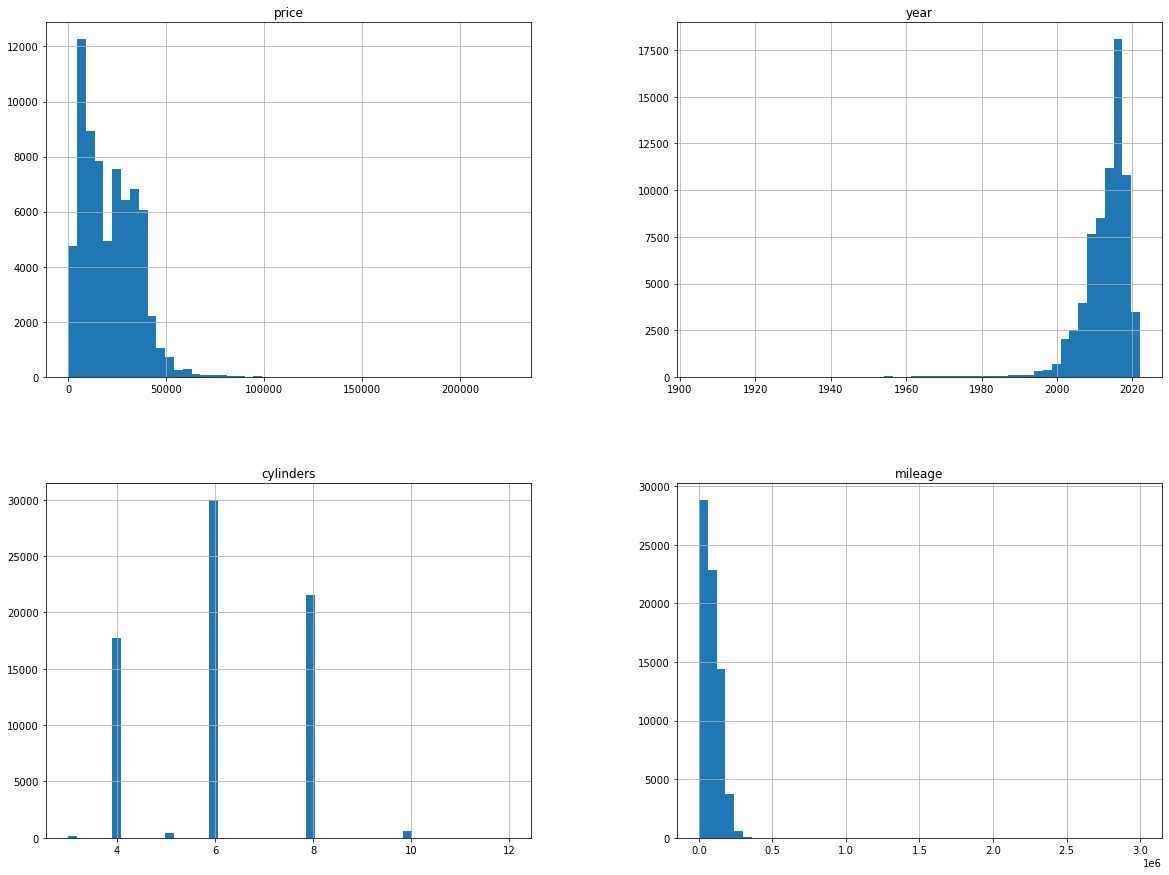

In [238]:
numAnalysis.hist(bins = 50, figsize = (20,15))
plt.show()

The histograms above show a positive skew to both sale price and mileage of cars which show a correlation between the two attributes. this is to be expected as a lower milage car is likely to be in better condition and is therefore worth more. The registration year histogram shows a negative skew, indicating that more modern cars have been sold than classics.

### Scatter Plots

<AxesSubplot:xlabel='year', ylabel='price'>

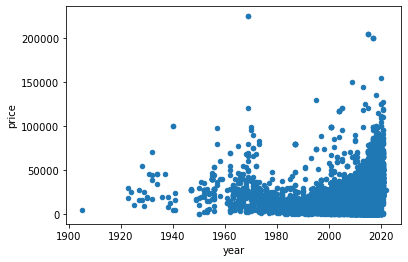

In [239]:
numAnalysis.plot(kind="scatter", x="year", y="price") 

<AxesSubplot:xlabel='mileage', ylabel='price'>

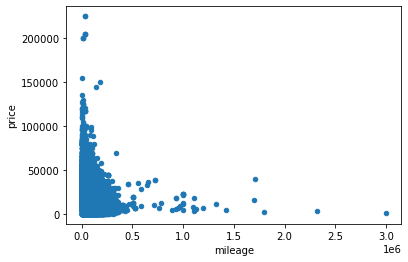

In [240]:
numAnalysis.plot(kind="scatter", x="mileage", y="price") 

<AxesSubplot:xlabel='year', ylabel='mileage'>

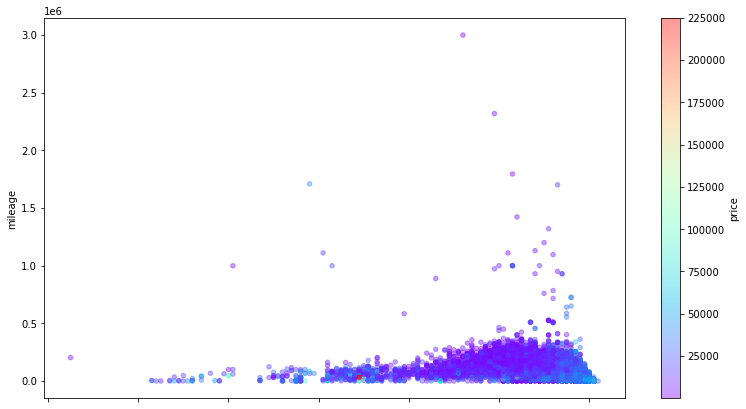

In [241]:
numAnalysis.plot(kind="scatter", x="year", y="mileage",
     figsize=(13,7), c="price", cmap=plt.get_cmap("rainbow"), alpha = 0.4, colorbar=True,
)

#### Reducing Data Noise

In [242]:
numAnalysis_noise = numAnalysis[numAnalysis.mileage <= 0.4e+06]
numAnalysis_noise = numAnalysis_noise[numAnalysis_noise.price <= 100000]

<AxesSubplot:xlabel='year', ylabel='mileage'>

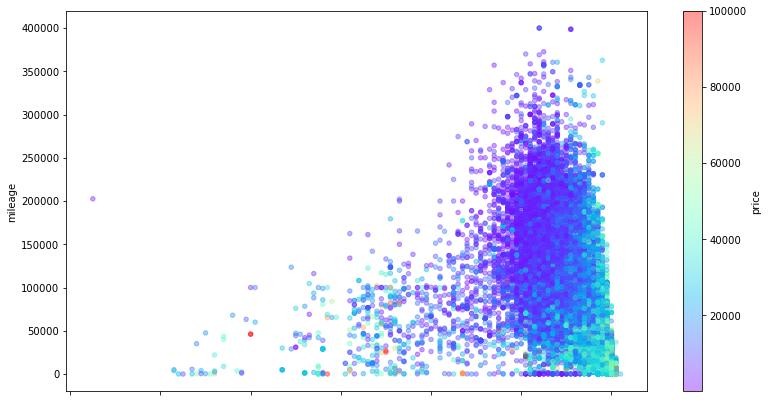

In [243]:
numAnalysis_noise.plot(kind="scatter", x="year", y="mileage",
     figsize=(13,7), c="price", cmap=plt.get_cmap("rainbow"), alpha = 0.4, colorbar=True,
)

After removing some of the outliers from the mileage and price attributes we can more clearly see the correlation present - the mileage of a car tends to increase for newer, more reliable cars, decreasing again approaching the present and, more importantly, as age and mileage increase, price decreases. 

In [244]:
numAnalysis["condition"].value_counts()

good         37495
excellent    27388
like new      4785
fair           629
new            201
salvage         44
Name: condition, dtype: int64

In [245]:
numAnalysis_noise = numAnalysis_noise[numAnalysis_noise.year >= 1980]
ranking = {"condition":{"new": 6, "like new": 5, "excellent": 4, "good": 3, "fair": 2, "salvage": 1}}
numAnalysis_ranking = numAnalysis_noise.replace(ranking)

In [246]:
numAnalysis_ranking["condition"].value_counts()

3    37316
4    27127
5     4744
2      589
6      198
1       43
Name: condition, dtype: int64

<AxesSubplot:xlabel='year', ylabel='price'>

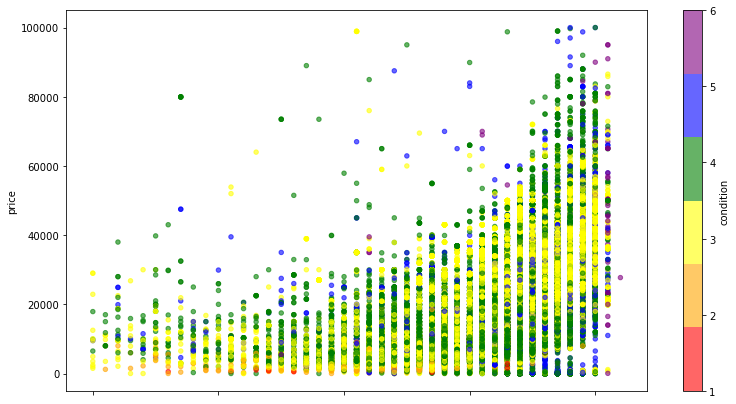

In [247]:
numAnalysis_ranking.plot(kind="scatter", x="year", y="price", alpha = 0.6, 
     figsize=(13,7), c="condition", cmap = mpl.colors.ListedColormap(['red', 'orange', 'yellow', 'green', 'blue', 'purple'])
        , colorbar=True)

This plots the year against the price (with some of the extreme values removed) with the colour indicating the condition of the vehicle (1/red being 'salvage', and 6/purple being 'new'). This plot shows that as age and price increases, the car is generally in better condition, and the older and cheaper cars are in a worse condition, which was to be expected

#### Correlation Analysis

In [248]:
corr_matrix = numAnalysis.corr()
corr_matrix["price"].sort_values(ascending=False)

price        1.000000
year         0.445063
cylinders    0.417310
mileage     -0.551885
Name: price, dtype: float64

The correlations discussed above are further justified when looking at the correlation matrix, this shows a strong negative correlation between mileage and price, meaning that the more miles a vehicle has done, the less it's worth and vice versa. Similarly there is a fairly strong positive correlation between the price and the year of the car, showing that the newer the car, the more valuabe and vice versa.

### Mapping Sales

Now I will use the 'lat' and 'long' attributes to plot the sales geographically to see if there is any correlation between geographical location, and the price of the car

#### Formatting Latitude and Longitude Data

First I need to remove the lat/long values which are not in the US, I also removed some of the noise from the price as this made it more difficult to see correlations. 

In [249]:
map_data = salesData
map_data = map_data[map_data.lat <= 50]
map_data = map_data[map_data.lat >= 20]
map_data = map_data[map_data.long <= -60]
map_data = map_data[map_data.long >= -125]
map_data = map_data[map_data.price <= 100000]

<AxesSubplot:xlabel='long', ylabel='lat'>

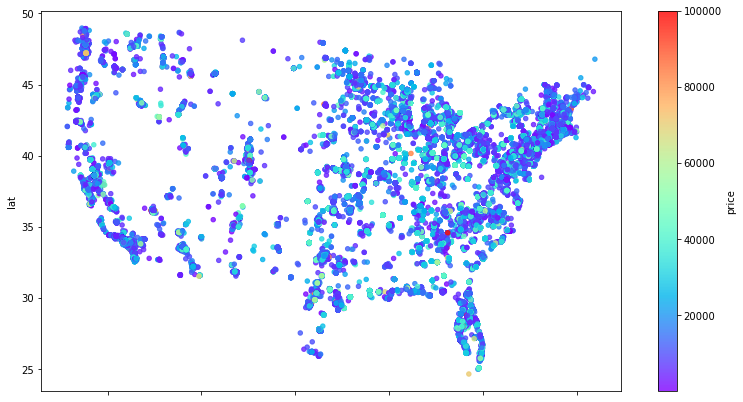

In [250]:
map_data.plot(kind="scatter", x="long", y="lat",
     figsize=(13,7), c="price", cmap=plt.get_cmap("rainbow"), alpha = 0.8, colorbar=True,
)

The map above shows the distribution of the data across the US. Once again price is indicated by colour, the map shows that more cars have been sold on the east coast and prices generally tend to be higher there. The highest prices can be seen in the cluster north-east of the centre but peaks also appear in the north-west and south-east, however, prices tend to be spread fairly evenly across the country.

This goes against my expectations, I would have expected the east and west coast to have the highest sales and prices as these areas have the richest cities (New York, Los Angeles etc.)  

### Scatter Matrix

array([[<AxesSubplot:xlabel='year', ylabel='year'>,
        <AxesSubplot:xlabel='mileage', ylabel='year'>,
        <AxesSubplot:xlabel='price', ylabel='year'>],
       [<AxesSubplot:xlabel='year', ylabel='mileage'>,
        <AxesSubplot:xlabel='mileage', ylabel='mileage'>,
        <AxesSubplot:xlabel='price', ylabel='mileage'>],
       [<AxesSubplot:xlabel='year', ylabel='price'>,
        <AxesSubplot:xlabel='mileage', ylabel='price'>,
        <AxesSubplot:xlabel='price', ylabel='price'>]], dtype=object)

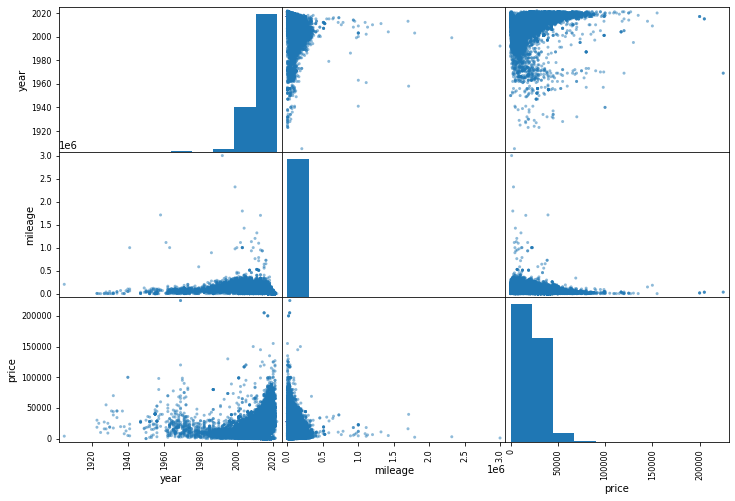

In [251]:
from pandas.plotting import scatter_matrix

attributes = ["year", "mileage", "price"]
scatter_matrix(salesData[attributes], figsize=(12, 8))

### Combining Attributes

In [252]:
combiSales = numAnalysis[numAnalysis.mileage != 0]
combiSales = combiSales[combiSales.price != 0]
combiSales["age"] = (2023-combiSales["year"]) # I'm using 2023 as some new cars in this dataset are branded as the 2022 model
                                              # and for this analysis to work I need values >= 1 
combiSales["miles_per_year"] = (combiSales["mileage"]/combiSales["age"])

In [253]:
combiSales.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,mileage,title_status,transmission,VIN,paint_color,state,age,miles_per_year
0,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8,gas,57923.0,clean,other,3GTP1VEC4EG551563,white,al,9.0,6435.888889
1,auburn,22590,2010.0,chevrolet,silverado 1500,good,8,gas,71229.0,clean,other,1GCSCSE06AZ123805,blue,al,13.0,5479.153846
2,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8,gas,19160.0,clean,other,3GCPWCED5LG130317,red,al,3.0,6386.666667
3,auburn,30990,2017.0,toyota,tundra double cab sr,good,8,gas,41124.0,clean,other,5TFRM5F17HX120972,red,al,6.0,6854.000000
4,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8,gas,68696.0,clean,other,1GT220CG8CZ231238,black,al,11.0,6245.090909


#### Scatter Plot

<AxesSubplot:xlabel='miles_per_year', ylabel='price'>

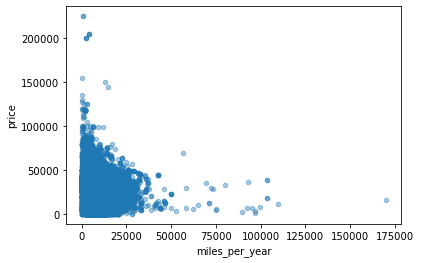

In [254]:
combiSales.plot(kind = "scatter", x = "miles_per_year", y = "price", alpha = 0.4)

Similar to the other plots, this plot shows a correlation between age, mileage and price, once again, the more miles a vehicle does per year, the less its worth, however, it is interesting to note that vehicles mostly cluster from 0-25000 miles per year.

#### Histogram and Numerical Analysis

count     70542.000000
mean       8375.831127
std        5093.329821
min           0.010101
25%        4845.250000
50%        7850.522727
75%       11141.375000
max      170128.900000
Name: miles_per_year, dtype: float64

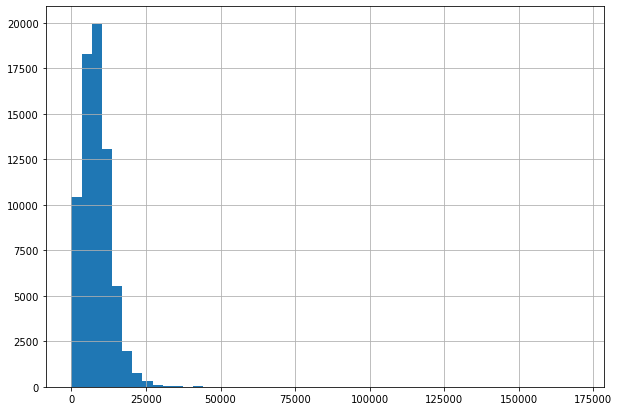

In [255]:
combiSales["miles_per_year"].hist(bins = 50, figsize = (10,7))
combiSales["miles_per_year"].describe()

The histogram of the miles per year shows a very strong positive skew and high clustering with almost all of the data falling before 25000 "mpy". 

#### Correlation Analysis

In [256]:
corr_matrix = combiSales.corr()
corr_matrix["price"].sort_values(ascending=False)

price             1.000000
year              0.445063
cylinders         0.417310
miles_per_year   -0.286449
age              -0.445063
mileage          -0.551885
Name: price, dtype: float64

The correlation matrix also shows the negative correlation between miles per year and price, interestingly, this is not as strongly negative as mileage or age individually.

### Evaluation of Data

Overall my data follows the trends that I would expect it to follow, generally speaking the newer the car and the fewer miles it has done, the higher the value. The data analysis I've done here however does not take into account the categorical data associated with the cars, such as: colour, make, and model. These factors will also be a determining factor in the overall price of the vehicles and I am hopeful that the machine learning algorithms will pick up on these quantitative attributes and take them into account when predicting the price of a vehicle.

## Classification Pre-processing

In [257]:
from sklearn import preprocessing
dataFrame = salesData.copy()
le = preprocessing.LabelEncoder()

dataFrame = dataFrame[dataFrame.mileage <= 0.4e+06]
dataFrame = dataFrame[dataFrame.price <= 100000]
dataFrame = dataFrame[dataFrame.year >= 1980]
bins = [0,20000,40000,60000,80000,100000]
dataFrame["bin_price"] = pd.cut(dataFrame["price"], len(bins), labels=bins)

dataFrame["region"] = le.fit_transform(dataFrame["region"])
dataFrame["manufacturer"] = le.fit_transform(dataFrame["manufacturer"])
dataFrame["model"] = le.fit_transform(dataFrame["model"])
dataFrame["condition"] = le.fit_transform(dataFrame["condition"])
dataFrame["fuel"] = le.fit_transform(dataFrame["fuel"])
dataFrame["title_status"] = le.fit_transform(dataFrame["title_status"])
dataFrame["transmission"] = le.fit_transform(dataFrame["transmission"])
dataFrame["paint_color"] = le.fit_transform(dataFrame["paint_color"])
dataFrame["state"] = le.fit_transform(dataFrame["state"])

dataFrame["age"] = (2023-dataFrame["year"])
dataFrame = dataFrame.drop("year", axis =1)
dataFrame = dataFrame.drop("VIN", axis =1)
dataFrame = dataFrame.drop("lat", axis =1)
dataFrame = dataFrame.drop("long", axis =1)
dataFrame.head()

,region,price,manufacturer,model,condition,cylinders,fuel,mileage,title_status,transmission,paint_color,state,bin_price,age
0,16,33590,14,5312,2,8,2,57923.0,0,2,10,1,40000,9.0
1,16,22590,7,5401,2,8,2,71229.0,0,2,1,1,20000,13.0
2,16,39590,7,5410,2,8,2,19160.0,0,2,8,1,40000,3.0
3,16,30990,38,6242,2,8,2,41124.0,0,2,8,1,20000,6.0
4,16,27990,14,5346,2,8,2,68696.0,0,2,0,1,20000,11.0


In [258]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

data_model = dataFrame.copy()
data_model = data_model.drop("price", axis = 1)
data_model = data_model.drop("bin_price", axis = 1)
data_price = dataFrame["bin_price"]
clf.fit(data_model,data_price)

GaussianNB()

In [259]:
clf.score(data_model,data_price)

0.6535841295685334

## Classification Metrics

Metrics found from: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

### Accuracy

In [260]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf, data_model, data_price, cv=3, scoring="accuracy")

array([0.66121085, 0.65452676, 0.62757616])

In [261]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

y_true = dataFrame["bin_price"]
y_pred = cross_val_predict(clf, data_model, data_price, cv=3)
array = confusion_matrix(y_true, y_pred)

<AxesSubplot:>

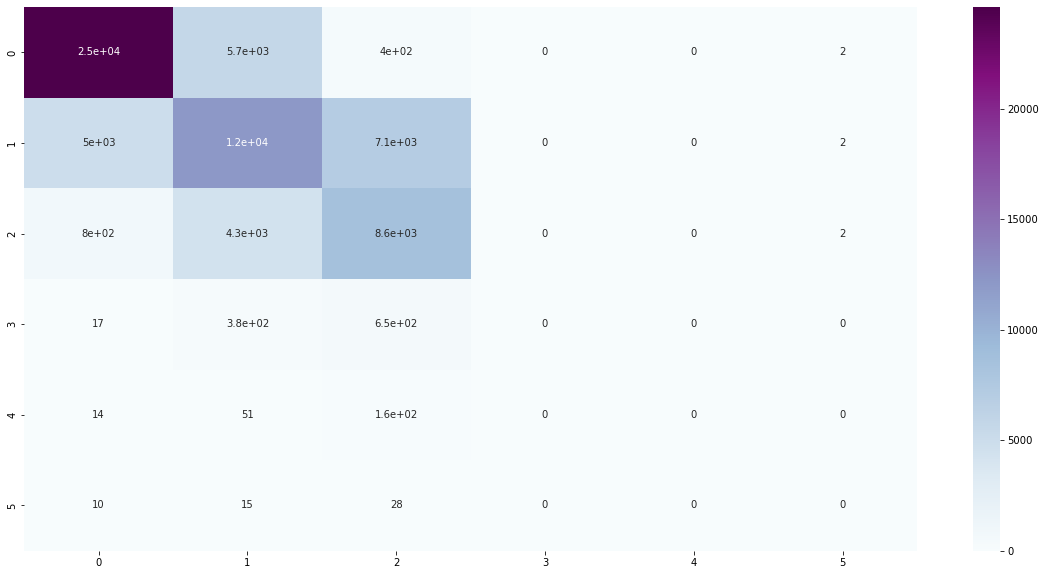

In [262]:
import seaborn as sb

heat = pd.DataFrame(array)
plt.figure(figsize = (20,10))
sb.heatmap(heat, annot=True,cmap="BuPu")

Heatmap found at: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

In [263]:
tp = []
i = 0
for a in array:
    tp.append(a[i])
    i += 1

In [264]:
fpw = []
for a in array:
    sum = 0
    for j in a:
        sum += j
    fpw.append(sum)

i = 0
fp = []
for f in fpw:
    f = (f - tp[i])
    i += 1
    fp.append(f)

In [265]:
fnw = []
i = 0
while i < 6:
    sum = 0
    for a in array:
        sum += a[i]
    i += 1
    fnw.append(sum)

j= 0
fn = []
for f in fnw:
    f = (f - tp[j])
    j += 1
    fn.append(f)

In [266]:
total = 0

for f in fpw:
    total += f

tn = []
i = 0
t = total
sum = 0
while i < 6:
    sum = t - tp[i] - fp[i] - fn[i]
    tn.append(sum)
    sum = 0
    t = total
    i += 1

In [267]:
values = pd.DataFrame({'TP': tp, 'TN': tn, 'FP': fp, 'FN': fn})
values.head()

,TP,TN,FP,FN
0,24591,33502,6116,5808
1,12130,35324,12061,10502
2,8634,47887,5150,8346
3,0,68964,1053,0
4,0,69788,229,0


The DataFrame 'values' contains the TP, TN, FP and FN values for all 6 of the classes.

### Precision and Recall

#### Precision

In [268]:
from sklearn.metrics import precision_score

precision_score(y_true, y_pred, average = 'macro')

C:\Users\camer\anaconda3\envs\DataMining\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.30889807027841765

#### Recall

In [269]:
from sklearn.metrics import recall_score

recall_score(y_true, y_pred, average = 'macro')

0.32143862215481633

#### F-measure

In [270]:
from sklearn.metrics import f1_score

f1_score(y_true, y_pred, average = 'macro')

0.3140484229126424

### Area under ROC

In [271]:
from sklearn.metrics import roc_auc_score

prediction = clf.predict_proba(data_model)
roc_auc_score(data_price, prediction, average = 'macro', multi_class = 'ovr')

0.8714513342779848

### Metric conclusions

The first metric I studied was the accuracy, using cross_val_score to give the accuracy across three folds of the dataset, giving accuracies ranging from 0.63 to 0.66. The recall and precision are slightly lower however, this could be due to there not being many of instances of the higher prices, so the model has far less to train on and so is less able to predict these. This being said there is a good precision recall trade of. The high ROC score suggests that overall the model classifies the data well.  

# Attribute Selection

In this section, I will be creating three distinct datasets, each with reduced features and I will be running my ML algorithms on each of the datasets. I will also be assigning the categorical data a numerical value.

Data preprocessing found at: "https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html"

In [272]:
corrMatrix = dataFrame.corr()
corrMatrix["price"].sort_values(ascending=False)

price           1.000000
transmission    0.444768
cylinders       0.423269
condition       0.275744
model           0.076933
paint_color     0.023286
state           0.020079
region         -0.057648
title_status   -0.075594
fuel           -0.099967
manufacturer   -0.116536
age            -0.576897
mileage        -0.610107
Name: price, dtype: float64

In [273]:
dataset3 = dataFrame.copy()
dataset3 = dataset3.drop(["state","paint_color","region"], axis = 1)
dataset3.head()

,price,manufacturer,model,condition,cylinders,fuel,mileage,title_status,transmission,bin_price,age
0,33590,14,5312,2,8,2,57923.0,0,2,40000,9.0
1,22590,7,5401,2,8,2,71229.0,0,2,20000,13.0
2,39590,7,5410,2,8,2,19160.0,0,2,40000,3.0
3,30990,38,6242,2,8,2,41124.0,0,2,20000,6.0
4,27990,14,5346,2,8,2,68696.0,0,2,20000,11.0


For my dataset3, I have removed the attributes with a |correlation| < 0.06, these attributes offer very little to no correlation with the class attribute.  

In [274]:
corrMatrix = dataset3.corr()
corrMatrix["price"].sort_values(ascending=False)

price           1.000000
transmission    0.444768
cylinders       0.423269
condition       0.275744
model           0.076933
title_status   -0.075594
fuel           -0.099967
manufacturer   -0.116536
age            -0.576897
mileage        -0.610107
Name: price, dtype: float64

In [275]:
dataset2 = dataset3.drop(["fuel","title_status","model"], axis = 1)

In [276]:
dataset2.head()

,price,manufacturer,condition,cylinders,mileage,transmission,bin_price,age
0,33590,14,2,8,57923.0,2,40000,9.0
1,22590,7,2,8,71229.0,2,20000,13.0
2,39590,7,2,8,19160.0,2,40000,3.0
3,30990,38,2,8,41124.0,2,20000,6.0
4,27990,14,2,8,68696.0,2,20000,11.0


Using the correlation matrix I created, I have removed all attributes with |correlation| =< 0.1

In [277]:
corrMatrix2 = dataset2.corr()
corrMatrix2["price"].sort_values(ascending = False)

price           1.000000
transmission    0.444768
cylinders       0.423269
condition       0.275744
manufacturer   -0.116536
age            -0.576897
mileage        -0.610107
Name: price, dtype: float64

In [278]:
dataset1 = dataset2.drop(["condition", "manufacturer"], axis = 1)

In [279]:
dataset1.head()

,price,cylinders,mileage,transmission,bin_price,age
0,33590,8,57923.0,2,40000,9.0
1,22590,8,71229.0,2,20000,13.0
2,39590,8,19160.0,2,40000,3.0
3,30990,8,41124.0,2,20000,6.0
4,27990,8,68696.0,2,20000,11.0


For my final dataset, I removed the attributes with |correlation| < 0.4, leaving me with the attributes price, cylinders, mileage, transmission and age 

## Classifying datasets

In [280]:
from sklearn.naive_bayes import GaussianNB
clf1 = GaussianNB()
clf2 = GaussianNB()
clf3 = GaussianNB()

dataset1 = dataset1.drop("price", axis = 1)
data_model1 = dataset1.copy()
data_model1 = data_model1.drop("bin_price", axis = 1)
data_price1 = dataset1["bin_price"]
clf1.fit(data_model1,data_price1)

dataset2 = dataset2.drop("price", axis = 1)
data_model2 = dataset2.copy()
data_model2 = data_model2.drop("bin_price", axis = 1)
data_price2 = dataset2["bin_price"]
clf2.fit(data_model2,data_price2)

dataset3 = dataset3.drop("price", axis = 1)
data_model3 = dataset3.copy()
data_model3 = data_model3.drop("bin_price", axis = 1)
data_price3 = dataset3["bin_price"]
clf3.fit(data_model3,data_price3)

GaussianNB()

I have chosen to use the Gaussian Naive Bayes algorithm as the histograms of my data show a Gaussian Distribution, therefore I believe this to be the most accurate Naive Bayes classifier.

In [281]:
clf1.score(data_model1,data_price1)

0.6499850036419726

In [282]:
clf2.score(data_model2,data_price2)

0.6468143450876216

In [283]:
clf3.score(data_model3,data_price3)

0.6536841052887156

In [284]:
d = {'Dataset': ["1", "2", "3"], 
     'Accuracy': [clf1.score(data_model1,data_price1)*100, clf2.score(data_model2,data_price2)*100, clf3.score(data_model3,data_price3)*100]}
df = pd.DataFrame(data = d)
df.head()

,Dataset,Accuracy
0,1,64.998500
1,2,64.681435
2,3,65.368411


<AxesSubplot:xlabel='Dataset'>

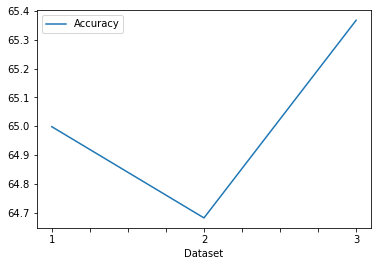

In [285]:
df.plot(kind = "line", x = "Dataset", y = "Accuracy")

Here we see the accuracy of the classifier increase as we include more attributes , however, the accuracy is still within 0.7% showing a very high accuracy in classification across all three datasets. There is an dip in the middle as dataset1 has a slightly higher accuracy than dataset2.

## Metric Analysis

## Dataset 3

#### Accuracy

In [286]:
cross_val_score(clf3, data_model3, data_price3, cv=3, scoring="accuracy")

array([0.63498865, 0.65932559, 0.6625391 ])

#### Confusion Matrix

<AxesSubplot:>

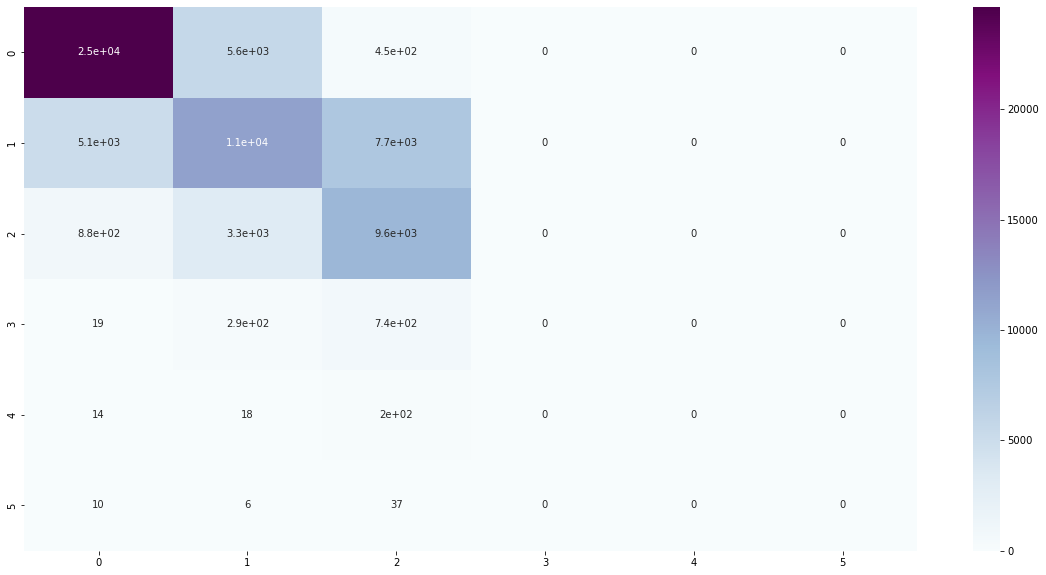

In [287]:
y_true = data_price3
y_pred = cross_val_predict(clf3, data_model3, data_price3, cv=3)
array3 = confusion_matrix(y_true, y_pred)
heat3 = pd.DataFrame(array3)
plt.figure(figsize = (20,10))
sb.heatmap(heat3, annot=True,cmap="BuPu")

In [288]:
#Function get_values calculates the TP, TN, FP and FN values for each class from the array created by the confusion matrix
def get_values(data):
    #TP values
    tp = []
    i = 0
    for a in data:
        tp.append(a[i])
        i += 1

    #FP values
    fpw = []
    for a in data:
        sum = 0
        for j in a:
            sum += j
        fpw.append(sum)

    i = 0
    fp = []
    for f in fpw:
        f = (f - tp[i])
        i += 1
        fp.append(f)

    #FN values
    fnw = []
    i = 0
    while i < 6:
        sum = 0
        for a in data:
            sum += a[i]
        i += 1
        fnw.append(sum)

    j= 0
    fn = []
    for f in fnw:
        f = (f - tp[j])
        j += 1
        fn.append(f)

    #TN values
    total = 0

    for f in fpw:
        total += f

    tn = []
    i = 0
    t = total
    sum = 0
    while i < 6:
        sum = t - tp[i] - fp[i] - fn[i]
        tn.append(sum)
        sum = 0
        t = total
        i += 1
        
    return tp,tn,fp,fn

In [289]:
tp,tn,fp,fn = get_values(array3)
values3 = pd.DataFrame({'TP': tp, 'TN': tn, 'FP': fp, 'FN': fn})
values3.head()

,TP,TN,FP,FN
0,24617,33329,6090,5981
1,11413,36604,12778,9222
2,9641,47090,4143,9143
3,0,68964,1053,0
4,0,69788,229,0


In [290]:
precision = []
recall = []
fmeasure = []
roc = []

#### Precision

In [291]:
p = precision_score(y_true, y_pred, average = 'macro')
precision.append(p)
print(p)

0.31181251358998463


C:\Users\camer\anaconda3\envs\DataMining\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Recall

In [292]:
r = recall_score(y_true, y_pred, average = 'macro')
recall.append(r)
print(r)

0.3288158400317392


#### F-measure

In [293]:
f = f1_score(y_true, y_pred, average = 'macro')
fmeasure.append(f)
print(f)

0.3173943683735914


#### ROC

In [294]:
prediction = clf3.predict_proba(data_model3)
ro = roc_auc_score(data_price3, prediction, average = 'macro', multi_class = 'ovr')
roc.append(ro)
print(ro)

0.8691353068224231


## Dataset 2 

#### Accuracy

In [295]:
cross_val_score(clf2, data_model2, data_price2, cv=3, scoring="accuracy")

array([0.62856164, 0.65371267, 0.65568362])

#### Confusion Matrix

<AxesSubplot:>

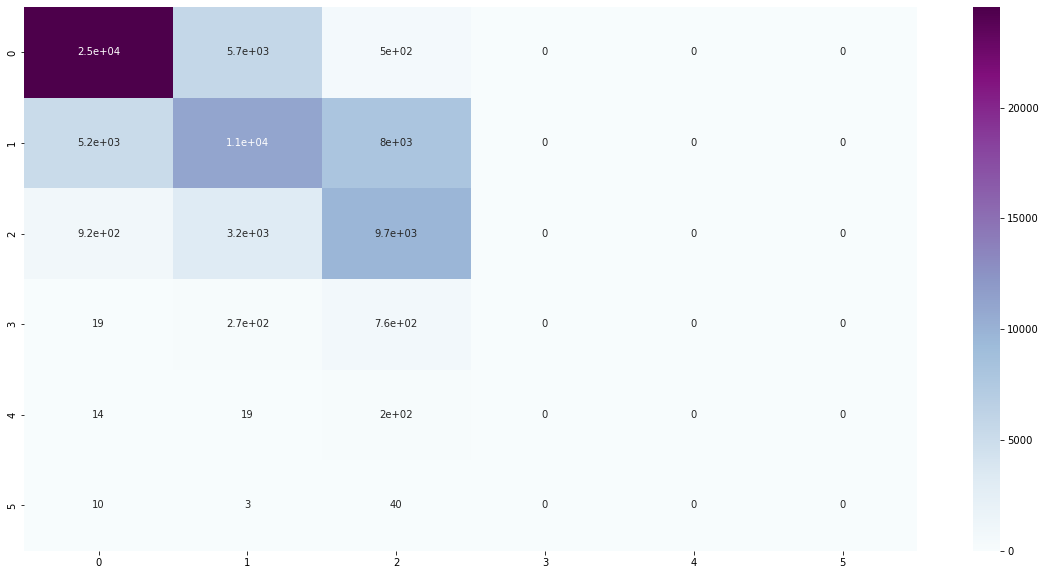

In [296]:
y_true = data_price2
y_pred = cross_val_predict(clf2, data_model2, data_price2, cv=3)
array2 = confusion_matrix(y_true, y_pred)
heat2 = pd.DataFrame(array2)
plt.figure(figsize = (20,10))
sb.heatmap(heat2, annot=True,cmap="BuPu")

In [297]:
tp,tn,fp,fn = get_values(array2)
values2 = pd.DataFrame({'TP': tp, 'TN': tn, 'FP': fp, 'FN': fn})
values2.head()

,TP,TN,FP,FN
0,24527,33165,6180,6145
1,11024,36679,13167,9147
2,9679,46738,4105,9495
3,0,68964,1053,0
4,0,69788,229,0


#### Precision

In [298]:
p = precision_score(y_true, y_pred, average = 'macro')
precision.append(p)
print(p)

0.3084966274356345


C:\Users\camer\anaconda3\envs\DataMining\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Recall

In [299]:
r = recall_score(y_true, y_pred, average = 'macro')
recall.append(r)
print(r)

0.32610676190419857


#### F-measure

In [300]:
f = f1_score(y_true, y_pred, average = 'macro')
fmeasure.append(f)
print(f)

0.31392566051049375


#### ROC

In [301]:
prediction = clf2.predict_proba(data_model2)
ro = roc_auc_score(data_price2, prediction, average = 'macro', multi_class = 'ovr')
roc.append(ro)
print(ro)

0.863650023589949


## Dataset 1

#### Accuracy

In [302]:
cross_val_score(clf1, data_model1, data_price1, cv=3, scoring="accuracy")

array([0.6322893 , 0.65444106, 0.66095377])

#### Confusion Matrix

<AxesSubplot:>

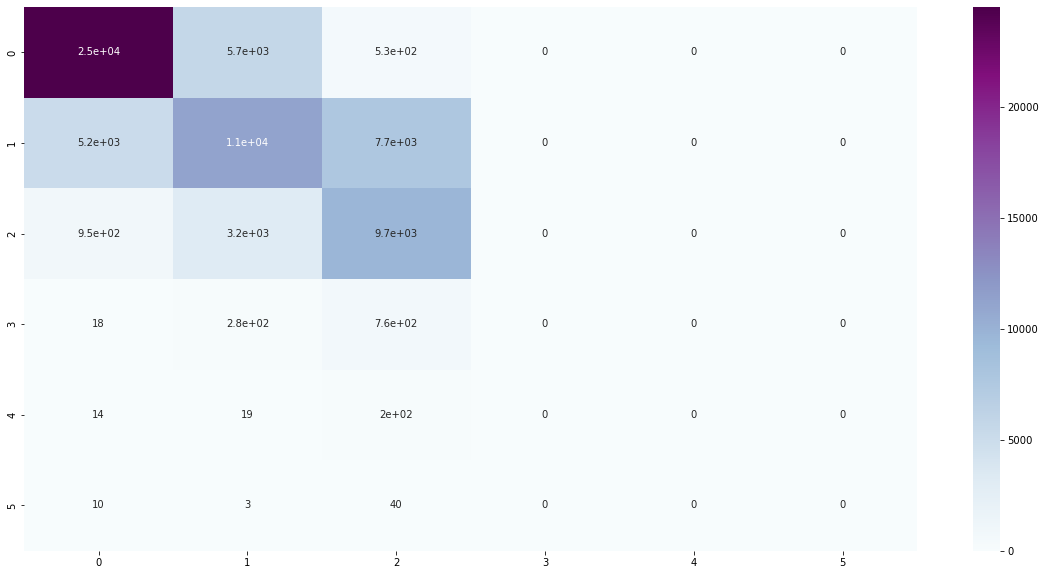

In [303]:
y_true = data_price1
y_pred = cross_val_predict(clf1, data_model1, data_price1, cv=3)
array1 = confusion_matrix(y_true, y_pred)
heat1 = pd.DataFrame(array1)
plt.figure(figsize = (20,10))
sb.heatmap(heat1, annot=True,cmap="BuPu")

In [304]:
tp,tn,fp,fn = get_values(array1)   
values1 = pd.DataFrame({'TP': tp, 'TN': tn, 'FP': fp, 'FN': fn})
values1.head()

,TP,TN,FP,FN
0,24507,33157,6200,6153
1,11281,36686,12910,9140
2,9669,46966,4115,9267
3,0,68964,1053,0
4,0,69788,229,0


#### Precision

In [305]:
p = precision_score(y_true, y_pred, average = 'macro')
precision.append(p)
print(p)

0.31039188291789704


C:\Users\camer\anaconda3\envs\DataMining\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Recall

In [306]:
r = recall_score(y_true, y_pred, average = 'macro')
recall.append(r)
print(r)

0.3276479268375639


#### F-measure

In [307]:
f = f1_score(y_true, y_pred, average = 'macro')
fmeasure.append(f)
print(f)

0.3159093203668934


#### ROC

In [308]:
prediction = clf1.predict_proba(data_model1)
ro = roc_auc_score(data_price1, prediction, average = 'macro', multi_class = 'ovr')
roc.append(ro)
print(ro)

0.8615181829565853


In [309]:
metrics = pd.DataFrame({'Dataset':['3','2','1'],'Precision':precision, 'Recall':recall, 'F-measure':fmeasure, 'ROC area':roc})
metrics.head()

,Dataset,Precision,Recall,F-measure,ROC area
0,3,0.311813,0.328816,0.317394,0.869135
1,2,0.308497,0.326107,0.313926,0.863650
2,1,0.310392,0.327648,0.315909,0.861518


<AxesSubplot:xlabel='Dataset'>

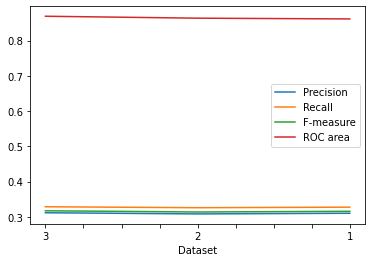

In [310]:
metrics.plot(kind = "line", x = 'Dataset')

### Conclusions

As shown in the graph above, There is little to no change in the values between the two datasets, this potentailly suggests that I would be able to remove more attributes to potentially increase accuracy. All the datasets have an ROC score of > 0.85 which suggests that they all have an excelent rate of classification, albeit with low precision and recall.

# Clustering

In [90]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer

In [91]:
clusterData = dataFrame.copy()
clusterData = clusterData.drop(["region","condition","title_status","transmission","paint_color","state","bin_price", 
                               "manufacturer", "model","price","cylinders","fuel"], axis = 1)

In [92]:
clusterData["age"] = (clusterData["age"] - clusterData["age"].min()) / (clusterData["age"].max() - clusterData["age"].min())
clusterData["mileage"] = (clusterData["mileage"] - clusterData["mileage"].min()) / (clusterData["mileage"].max() - clusterData["mileage"].min())

normalization for dataframe found at: https://www.geeksforgeeks.org/normalize-a-column-in-pandas/

To carry out the clustering section and be able to visualise my data, I have created a new data frame called clusterData with onyl two attributes. I have then normalized these attributes to give me more reliable scoring, the values now lie between 0 and 1 for both age and mileage

## Fit and Predict

In [93]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
ypred = kmeans.fit_predict(clusterData)

In [94]:
ypred

array([2, 2, 0, ..., 2, 0, 0])

In [95]:
kmeans.cluster_centers_

array([[0.06325448, 0.10098325],
       [0.49882781, 0.38775287],
       [0.18367508, 0.19605553],
       [0.33348201, 0.24921878],
       [0.25057162, 0.48144955]])

## Decision Boundaries

In [96]:
def plot_data(X):
    plt.plot(X.iloc[:, 0], X.iloc[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=10, linewidths=5,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=20, linewidths=20,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

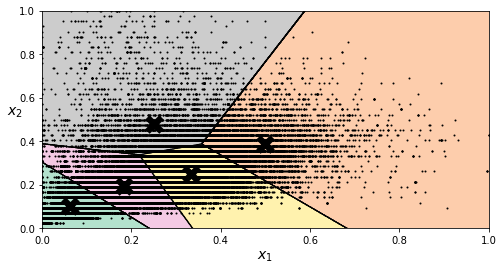

In [97]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, clusterData)
plt.axis([0, 1, 0, 1])
plt.show()

## Inertia

In [98]:
kmeans.inertia_

521.2983778986162

In [99]:
kmeans.score(clusterData)

-521.2983778986161

### Finding Optimal number of Clusters

First I will try different $k$ values manually to try and find the optimal value, below I show two values I tried, 3 and 8

In [100]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(13, 5))
    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)
    plt.axis([0, 1, 0, 1])
    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)
    plt.axis([0, 1, 0, 1])

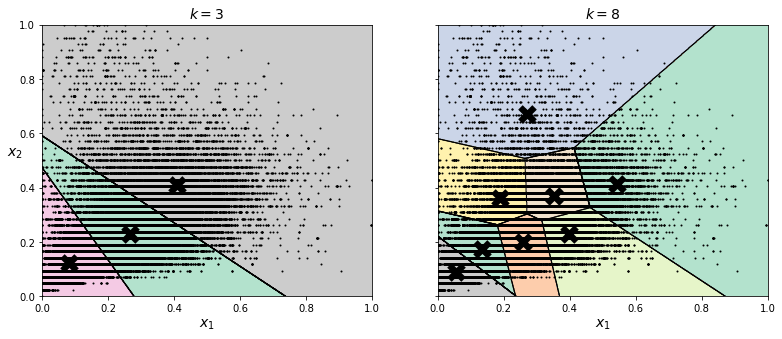

In [101]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, clusterData, "$k=3$", "$k=8$")

plt.show()

I believe the optimal value is $k=3$ from the manual trial and error I carried out, however, I will now concretely find the optimal value 

In [102]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(clusterData)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

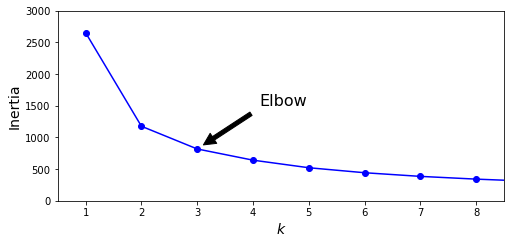

In [103]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(3, inertias[2]),
             xytext=(0.45, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([0.5, 8.5, 0, 3000])
plt.show()

Here we can see the elbow at $k=3$, meaning that using fewer than 3 clusters would be an innacurate choice, but using more than 3 clusters will show minimal improvement and may split clusters unnecessarily

## Using a different clustering algorithm

In [103]:
from sklearn.mixture import GaussianMixture

k = 5
gm = GaussianMixture(n_components = k, random_state = 42)
xpred = gm.fit_predict(clusterData)

In [104]:
xpred

array([2, 2, 0, ..., 2, 0, 0], dtype=int64)

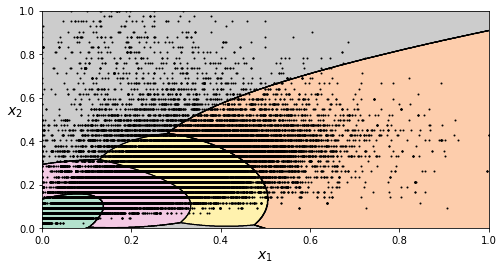

In [105]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(gm, clusterData, show_centroids = False)
plt.axis([0, 1, 0, 1])
plt.show()

### Scoring Gaussian Clustering

As the SKlearn Gaussian clustering algorithm doesn't have a built in score function like the KMeans algorithm does, I will be using the silhouette score imported from sklearn.metrics. Silhouette score is a measure of how dense the clusters are and the distance/overlap with other clusters. It is on a scale from -1 to 1, with 1 being the optimal score

In [107]:
from sklearn.metrics import silhouette_score

gmScore = silhouette_score(clusterData, xpred)

In [108]:
gmScore

0.37648789161119134

With 4 clusters, the silhouette score for Gaussian Mixture is 0.357, meaning that the clusters don't show very high definiton or densities.

### Finding the ideal number of clusters

#### Manually finding optimal K

In [109]:
def plot_gausclusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(13, 5))
    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X, show_centroids = False)
    if title1:
        plt.title(title1, fontsize=14)
    plt.axis([0, 1, 0, 1])
    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False, show_centroids = False)
    if title2:
        plt.title(title2, fontsize=14)
    plt.axis([0, 1, 0, 1])

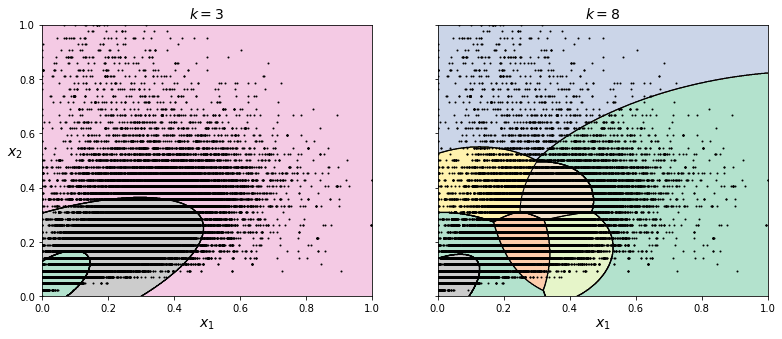

In [284]:
gm_k3 = GaussianMixture(n_components=3, random_state=42)
gm_k8 = GaussianMixture(n_components=8, random_state=42)

plot_gausclusterer_comparison(gm_k3, gm_k8, clusterData, "$k=3$", "$k=8$")

plt.show()

#### Concretely finding the optimal k

In [251]:
gm_per_k = [GaussianMixture(n_components = k, random_state = 42).fit_predict(clusterData)
                for k in range(2, 6)]

In [252]:
gm_per_k

[array([0, 1, 0, ..., 0, 0, 0], dtype=int64),
 array([2, 2, 0, ..., 0, 0, 0], dtype=int64),
 array([2, 2, 0, ..., 2, 0, 0], dtype=int64),
 array([2, 2, 0, ..., 2, 0, 0], dtype=int64)]

In [253]:
gmSilhouettes = [silhouette_score(clusterData, y) for y in gm_per_k]

In [254]:
gmSilhouettes

[0.4337773396469721,
 0.3700445825281611,
 0.3570535767225217,
 0.37648789161119134]

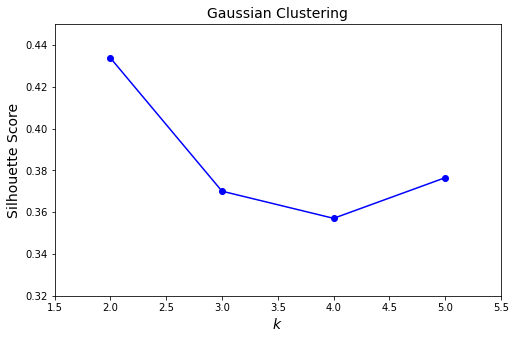

In [276]:
plt.figure(figsize=(8, 5))
plt.plot(range(2, 6), gmSilhouettes, "bo-")
plt.xlabel("$k$", fontsize = 14)
plt.ylabel("Silhouette Score", fontsize = 14)
plt.title("Gaussian Clustering", fontsize = 14)
plt.axis([1.5, 5.5, 0.32, 0.45])
plt.show()

Plotting the number of clusters against the Silhouette Score, we see that the optimal number of clusters is 2, with the score decreasing as $k$ increases. Interestingly, at $k=5$ there is a sharp increase in score, this could be due to an overlapping cluster being split into two more dense clusters which would marginally increase the score

## Comparing KMeans and Gaussian Clustering

In [256]:
km_per_k = [KMeans(n_clusters = k, random_state = 42).fit_predict(clusterData)
                for k in range(2, 6)]

In [257]:
kmSilhouettes = [silhouette_score(clusterData, j) for j in km_per_k]

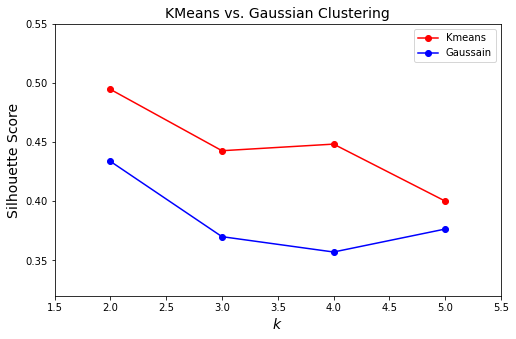

In [277]:
plt.figure(figsize=(8, 5))
plt.plot(range(2, 6), kmSilhouettes,"bo-", color = "red")
plt.plot(range(2,6), gmSilhouettes, "bo-")
plt.xlabel("$k$", fontsize = 14)
plt.ylabel("Silhouette Score", fontsize = 14)
plt.title("KMeans vs. Gaussian Clustering", fontsize = 14)
plt.axis([1.5, 5.5, 0.32, 0.55])
plt.legend(["Kmeans","Gaussain"])
plt.show()

When comparing KMeans and Gaussian clustering, we see a similar trend between the two with KMeans giving sligfhtly higher values, suggesting that it has more effectively clustered the data than the Gaussian algorithm. Interestingly, the silhouette score indicates that the optimal number of clusters for KMeans is 2 whereas the elbow suggested it would be 3.

## Clustering on more attributes

After finding that KMeans is the more accurate clustering method, I will now run this algorithm on the whole dataset.

In [157]:
clusterData2 = dataFrame.copy()
clusterData2 = clusterData2.drop(["price","bin_price"], axis =1 )
clusterData2.head()

,region,manufacturer,model,condition,cylinders,fuel,mileage,title_status,transmission,paint_color,state,age
0,16,14,5312,2,8,2,57923.0,0,2,10,1,9.0
1,16,7,5401,2,8,2,71229.0,0,2,1,1,13.0
2,16,7,5410,2,8,2,19160.0,0,2,8,1,3.0
3,16,38,6242,2,8,2,41124.0,0,2,8,1,6.0
4,16,14,5346,2,8,2,68696.0,0,2,0,1,11.0


In [158]:
def normalise(attribute):
    clusterData2[attribute] = (clusterData2[attribute] - clusterData2[attribute].min()) / (clusterData2[attribute].max() - clusterData2[attribute].min())

In [159]:
attributes = clusterData2.columns
for att in attributes:
    normalise(att);
clusterData2.head()

,region,manufacturer,model,condition,cylinders,fuel,mileage,title_status,transmission,paint_color,state,age
0,0.040201,0.350,0.790476,0.4,0.555556,0.5,0.144805,0.0,1.0,0.909091,0.02,0.190476
1,0.040201,0.175,0.803720,0.4,0.555556,0.5,0.178070,0.0,1.0,0.090909,0.02,0.285714
2,0.040201,0.175,0.805060,0.4,0.555556,0.5,0.047898,0.0,1.0,0.727273,0.02,0.047619
3,0.040201,0.950,0.928869,0.4,0.555556,0.5,0.102808,0.0,1.0,0.727273,0.02,0.119048
4,0.040201,0.350,0.795536,0.4,0.555556,0.5,0.171738,0.0,1.0,0.000000,0.02,0.238095


In [123]:
k = 5
kmeans2 = KMeans(n_clusters=k, random_state=42)
ypred2 = kmeans2.fit_predict(clusterData2)

In [124]:
kmeans2.inertia_

32383.305119455275

In [125]:
kmeans_per_k2 = [KMeans(n_clusters=k, random_state=42).fit(clusterData2)
                for k in range(1, 10)]
inertias2 = [model.inertia_ for model in kmeans_per_k2]

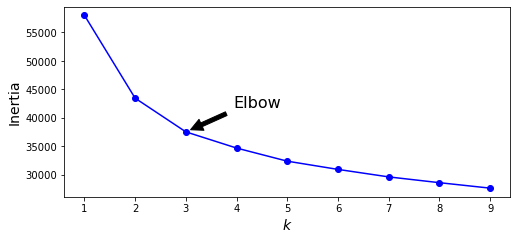

In [126]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias2, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(3, inertias2[2]),
             xytext=(0.45, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
#plt.axis([0.5, 8.5, 0, 3000])
plt.show()

Similar to with two attributes, the optimal number of clusters is 3, however the inertias are much higher due to the data being more spread out as it is influenced by many more attributes

## Overall Clustering conclusions

After looking at two clustering algorithms, I have found that my data does not conform very well to clustering, it is continuous data which has evenly spread values with no pre-existing clusters, thus, thrying to cluster the data is almost arbitrary and yields no meaningful results. When looking at Silhouette score, my highest value was 0.49 which shows average cluster definition and density, however this was only over 2 clusters so a high cluster definition is almost guaranteed. Comparatively, my bayesian classifier showed very high accuracy in data classification, suggesting it is far more suitable for my dataset

# Decision Trees

In [311]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

In [312]:
treeData = dataFrame.copy()
treeData = treeData.drop(["state","paint_color","region","fuel","title_status","model"], axis = 1)
treeData.head()

,price,manufacturer,condition,cylinders,mileage,transmission,bin_price,age
0,33590,14,2,8,57923.0,2,40000,9.0
1,22590,7,2,8,71229.0,2,20000,13.0
2,39590,7,2,8,19160.0,2,40000,3.0
3,30990,38,2,8,41124.0,2,20000,6.0
4,27990,14,2,8,68696.0,2,20000,11.0


In [313]:
train, test = train_test_split(treeData, test_size = 0.33, random_state = 42)

In [314]:
train_data = train.drop(["price","bin_price"], axis = 1)
train_target = train["bin_price"]

test_data = test.drop(["price","bin_price"], axis = 1)
test_target = test["bin_price"]

In [315]:
clf = DecisionTreeClassifier(max_depth = 5, random_state = 42)
clf.fit(train_data, train_target)

DecisionTreeClassifier(max_depth=5, random_state=42)

<function matplotlib.pyplot.show(close=None, block=None)>

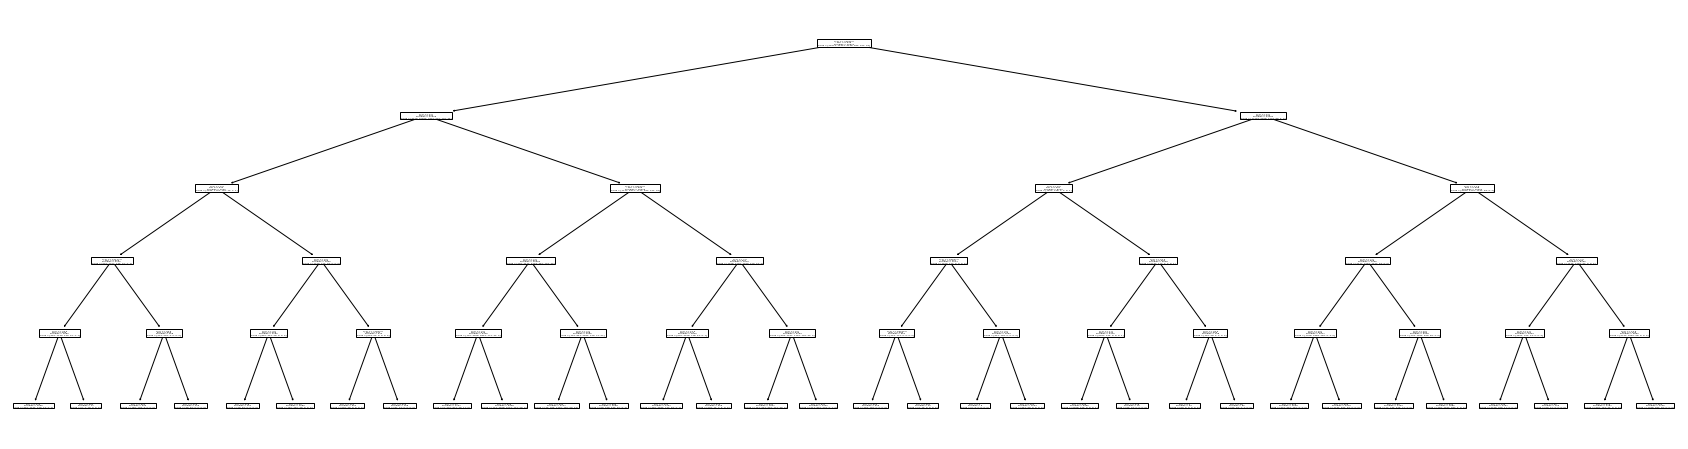

In [590]:
plt.figure(figsize=(30,8))
plot_tree(clf)
plt.show

### Measuring Accuracy on training set

In [591]:
accuracy = []
precision = []
recall = []
f_measure = []

In [592]:
clf.score(train_data, train_target)

0.7341774850248343

In [593]:
accuracy.append(clf.score(train_data, train_target))

In [594]:
y_true = train_target
y_pred = clf.predict(train_data)
tree_array = confusion_matrix(y_true, y_pred)
#heat1 = pd.DataFrame(tree_array)
#plt.figure(figsize = (20,10))
#sb.heatmap(heat1, annot=True,cmap="BuPu")

In [595]:
tp,tn,fp,fn = get_values(tree_array)   
tree_values = pd.DataFrame({'TP': tp, 'TN': tn, 'FP': fp, 'FN': fn})
tree_values.head()

,TP,TN,FP,FN
0,18329,22851,2244,3487
1,11406,24088,4908,6509
2,4706,35298,4433,2474
3,0,46215,696,0
4,0,46760,151,0


In [596]:
def get_metrics(true, pred):
    p = precision_score(y_true, y_pred, average = 'macro')
    precision.append(p)
    r = recall_score(y_true, y_pred, average = 'macro')
    recall.append(r)
    f = f1_score(y_true, y_pred, average = 'macro')
    f_measure.append(f)
    return p, r, f

In [597]:
get_metrics(y_true, y_pred)

C:\Users\camer\anaconda3\envs\DataMining\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.35537801945999664, 0.35083584802955947, 0.35133387998987087)

### Measuring Accuracy on cross validation

In [598]:
accuracies = cross_val_score(clf, train_data, train_target, cv=10, scoring="accuracy")
accuracies

array([0.74104859, 0.74568322, 0.73118738, 0.74461735, 0.73566404,
       0.73992752, 0.74120657, 0.74014069, 0.71882328, 0.74014069])

In [599]:
count = 0
for i in accuracies:
   count += i
averageAccuracy = count/10
averageAccuracy

0.7378439341591697

In [600]:
accuracy.append(averageAccuracy)

In [601]:
y_true = train_target
y_pred = cross_val_predict(clf, train_data, train_target, cv=10)
tree_array2 = confusion_matrix(y_true, y_pred)
#heat1 = pd.DataFrame(tree_array)
#plt.figure(figsize = (20,10))
#sb.heatmap(heat1, annot=True,cmap="BuPu")

In [602]:
tp,tn,fp,fn = get_values(tree_array2)   
tree_values2 = pd.DataFrame({'TP': tp, 'TN': tn, 'FP': fp, 'FN': fn})
tree_values2.head()

,TP,TN,FP,FN
0,18243,23113,2330,3225
1,11528,24157,4786,6440
2,4842,35139,4297,2633
3,0,46215,696,0
4,0,46760,151,0


In [603]:
get_metrics(y_true, y_pred)

C:\Users\camer\anaconda3\envs\DataMining\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.3565201081331118, 0.3538657282555715, 0.3538814190124828)

In [604]:
metrics = pd.DataFrame({'Scoring on':['Training','Cross Val'],'Precision':precision, 'Recall':recall, 'F-measure':f_measure, 'Accuracy':accuracy})
metrics.head()

,Scoring on,Precision,Recall,F-measure,Accuracy
0,Training,0.355378,0.350836,0.351334,0.734177
1,Cross Val,0.356520,0.353866,0.353881,0.737844


<AxesSubplot:title={'center':'Metrics on Training set and Cross Validation'}, xlabel='Scoring on'>

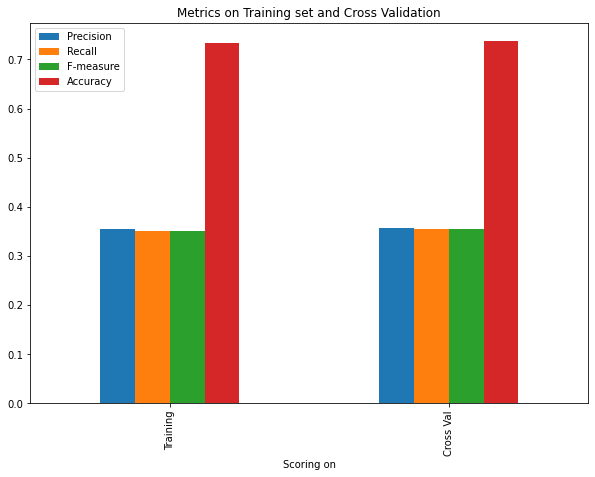

In [605]:
metrics.plot(x='Scoring on',
        kind='bar',
        stacked=False,
        title='Metrics on Training set and Cross Validation', 
        figsize=(10,7))

Looking at the two sets of metrics, we can see that when the classifier gives almost the exact same values when running on the training set and when using cross validation

### Measuring Accuracy on test data

In [606]:
clf.score(test_data, test_target)

0.7289015840041547

The accuracy when the classifier is trained on the train set and tested on the test set shows a slight decrease from 0.734 to 0.728, this is to be expected as when it is being tested and trained on the same data, it has already seen the examples to create the tree and so will be more accurate than unseen examples. Looking at the accuracy on the test set, we can see that the classifier generalises well - although not perfectly - to new examples, getting a correct classification in nearly the same number of cases as the optimal of when it's being classified on the training data

## Changing tree parameters

In [607]:
accuracy_for_depth = []
for i in range(1,20):
    clf = DecisionTreeClassifier(max_depth = i, random_state = 42)
    clf.fit(train_data, train_target)
    accuracy_for_depth.append(np.mean(cross_val_score(clf, train_data, train_target, cv=10, scoring="accuracy")));

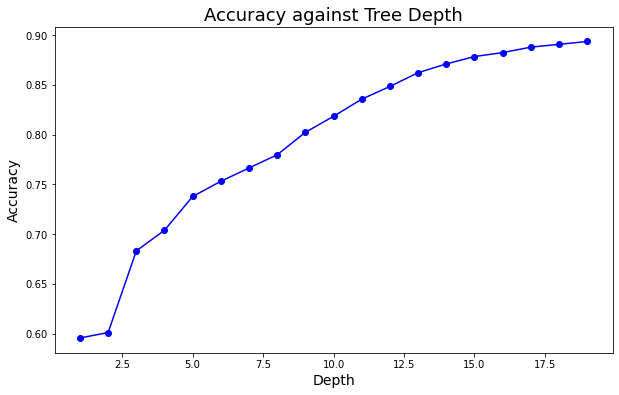

In [608]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), accuracy_for_depth, "bo-")
plt.xlabel("Depth", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Accuracy against Tree Depth", fontsize = 18)
plt.show()

## Finding Optimal Tree Depth

In [609]:
deriv_accuracy = []
for i in range(1,len(accuracy_for_depth)):
    deriv = accuracy_for_depth[i] - accuracy_for_depth[i-1]
    deriv_accuracy.append(deriv)

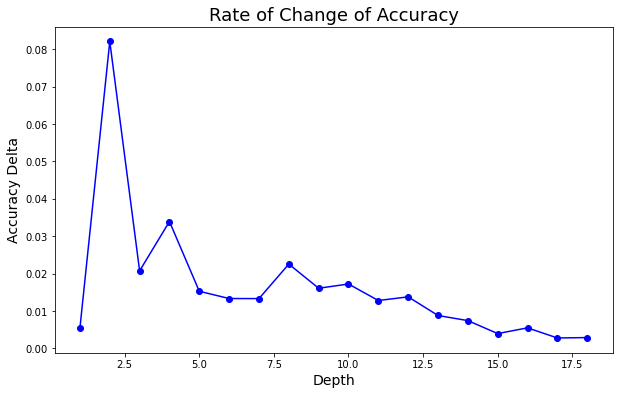

In [610]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 19), deriv_accuracy, "bo-")
plt.xlabel("Depth", fontsize=14)
plt.ylabel("Accuracy Delta", fontsize=14)
plt.title("Rate of Change of Accuracy", fontsize = 18)
plt.show()

Looking at the rate of accuracy change graph, we can determine that the optimal depth for the decision tree is between 1 and 5, as this is where the most rapid increase in accuracy occurs, as we start to increase the depth of the tree beyond this, the increase in accuracy becomes negligable and we are at greater risk of overfitting the model

In [611]:
accuracy_for_leaf_nodes = []
for i in range(2,20):
    clf = DecisionTreeClassifier(max_depth = 5, random_state = 42, max_leaf_nodes = i)
    clf.fit(train_data, train_target)
    accuracy_for_leaf_nodes.append(np.mean(cross_val_score(clf, train_data, train_target, cv=10, scoring="accuracy")));

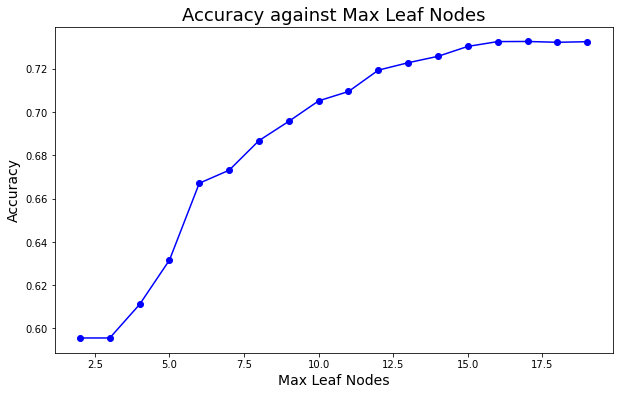

In [612]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 20), accuracy_for_leaf_nodes, "bo-")
plt.xlabel("Max Leaf Nodes", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Accuracy against Max Leaf Nodes", fontsize = 18)
plt.show()

In [613]:
deriv_accuracy = []
for i in range(2,len(accuracy_for_leaf_nodes)):
    deriv = accuracy_for_depth[i] - accuracy_for_leaf_nodes[i-1]
    deriv_accuracy.append(deriv)

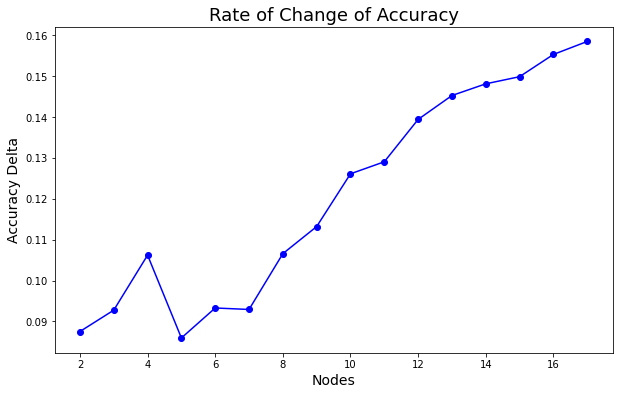

In [614]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 18), deriv_accuracy, "bo-")
plt.xlabel("Nodes", fontsize=14)
plt.ylabel("Accuracy Delta", fontsize=14)
plt.title("Rate of Change of Accuracy", fontsize = 18)
plt.show()

Similarly to the max depth, the rate of change above shows that the optimal maximum number of leaf nodes is between 2 and 4.

In [615]:
def new_split(percentage):
    train, test = train_test_split(treeData, test_size = (percentage/100), random_state = 42)
    train_data = train.drop(["price","bin_price"], axis = 1)
    train_target = train["bin_price"]
    test_data = test.drop(["price","bin_price"], axis = 1)
    test_target = test["bin_price"]
    clf.fit(train_data,train_target)
    trainScore = clf.score(train_data,train_target)
    testScore = clf.score(test_data,test_target)
    train_score.append(trainScore)
    test_score.append(testScore)
    
    return trainScore, testScore

In [616]:
train_score = []
test_score = []
for i in range(30,61):
    new_split(i)

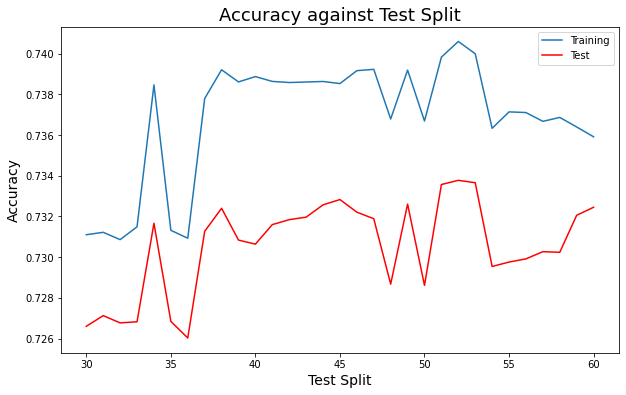

In [617]:
plt.figure(figsize=(10, 6))
plt.plot(range(30, 61), train_score)
plt.plot(range(30, 61), test_score, color = "red")
plt.xlabel("Test Split", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Accuracy against Test Split", fontsize = 18)
plt.legend(["Training","Test"])
plt.show()

The small difference in accuracy from the training set to the test set indicates that the model has not overfitted the model too much, if the model were overfitted, the graph would show a much greated difference in accuracy, and the two graphs would unlikely have such similar shapes.

# Random Forest Classifier

In [137]:
from sklearn.ensemble import RandomForestClassifier 

In [138]:
rndclf = RandomForestClassifier(max_depth = 5, random_state = 42, oob_score = True)
rndclf.fit(train_data,train_target)

RandomForestClassifier(max_depth=5, oob_score=True, random_state=42)

In [139]:
rndclf.oob_score_

0.7423205644731513

In [140]:
accuracy.append(rndclf.oob_score_)

In [141]:
y_true = train_target
y_pred = rndclf.predict(train_data)
forest_array = confusion_matrix(y_true, y_pred)

In [142]:
tp,tn,fp,fn = get_values(forest_array)   
forest_values = pd.DataFrame({'TP': tp, 'TN': tn, 'FP': fp, 'FN': fn})
forest_values.head()

,TP,TN,FP,FN
0,18816,22519,1757,3819
1,11815,24161,4499,6436
2,4419,36166,4720,1606
3,0,46215,696,0
4,0,46760,151,0


In [143]:
get_metrics(y_true, y_pred)

C:\Users\camer\anaconda3\envs\DataMining\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.368680794084675, 0.3537255848531531, 0.3562361822976847)

In [144]:
metrics = pd.DataFrame({'Scoring on':['Training Set','Cross Validation','Random Forest'],'Precision':precision, 'Recall':recall, 'F-measure':f_measure, 'Accuracy':accuracy})
metrics.head()

,Scoring on,Precision,Recall,F-measure,Accuracy
0,Training Set,0.355378,0.350836,0.351334,0.734177
1,Cross Validation,0.356520,0.353866,0.353881,0.737844
2,Random Forest,0.368681,0.353726,0.356236,0.742321


<AxesSubplot:title={'center':'Metrics on Training set, Cross Validation and Random Forest'}, xlabel='Scoring on'>

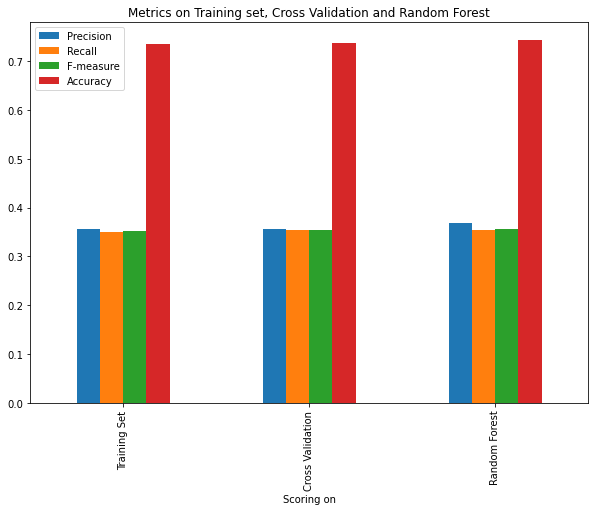

In [145]:
metrics.plot(x='Scoring on',
        kind='bar',
        stacked=False,
        title='Metrics on Training set, Cross Validation and Random Forest', 
        figsize=(10,7))

## How does random forest generalise?

In [146]:
print(clf.score(test_data, test_target))
print(rndclf.score(test_data, test_target))

0.7296373236388817
0.7396780057128018


Here we can see that the random forest gets a higher score than the traditional decision tree classifier, this would suggest that the random forest generalises better to unseen data.

## Changing Forest Parameters

In [147]:
accuracy_for_estimator = []
for i in range(100,301,10):
    rndclf = RandomForestClassifier(max_depth = 5, random_state = 42, n_estimators = i, oob_score = True)
    rndclf.fit(train_data, train_target)
    accuracy_for_estimator.append(rndclf.oob_score_);

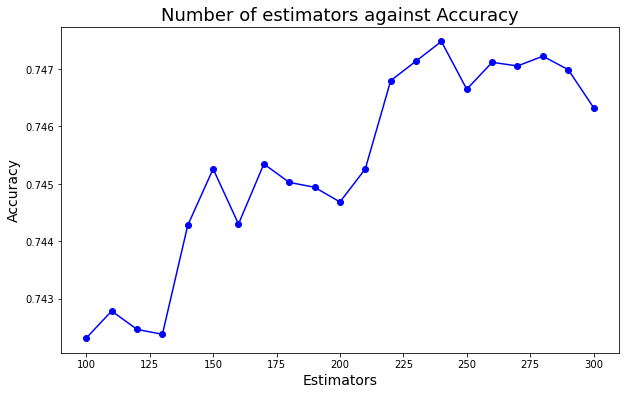

In [148]:
plt.figure(figsize=(10, 6))
plt.plot(range(100, 301,10), accuracy_for_estimator, "bo-")
plt.xlabel("Estimators", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Number of estimators against Accuracy", fontsize = 18)
plt.show()

Interestingly the number of estimators seems to vary the accuracy greatly, however very generally, the more estimators, the greater the accuracy. This being said, the difference in accuracy between 100 and 300 estimators is < 0.01.

In [149]:
accuracy_for_depth = []
for i in range(1,20):
    rndclf = RandomForestClassifier(max_depth = i, random_state = 42, oob_score = True)
    rndclf.fit(train_data, train_target)
    accuracy_for_depth.append(rndclf.oob_score_);

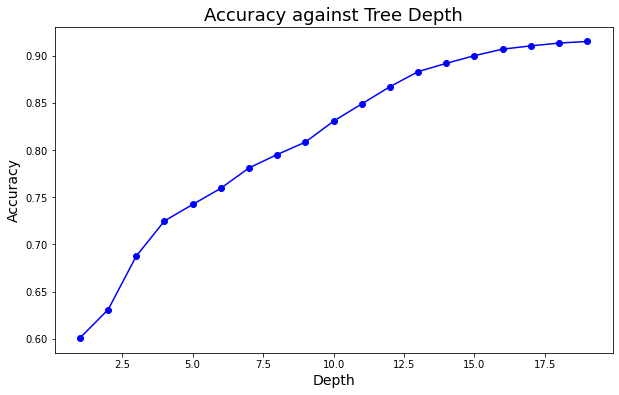

In [150]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), accuracy_for_depth, "bo-")
plt.xlabel("Depth", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Accuracy against Tree Depth", fontsize = 18)
plt.show()

In [151]:
def new_split_forest(percentage):
    train, test = train_test_split(treeData, test_size = (percentage/100), random_state = 42)
    train_data = train.drop(["price","bin_price"], axis = 1)
    train_target = train["bin_price"]
    test_data = test.drop(["price","bin_price"], axis = 1)
    test_target = test["bin_price"]
    rndclf.fit(train_data,train_target)
    trainScore = rndclf.oob_score_
    train_score.append(trainScore)
    test_score.append(testScore)
    
    return trainScore, testScore

In [152]:
train_score = []
test_score = []
for i in range(30,61):
    new_split(i)

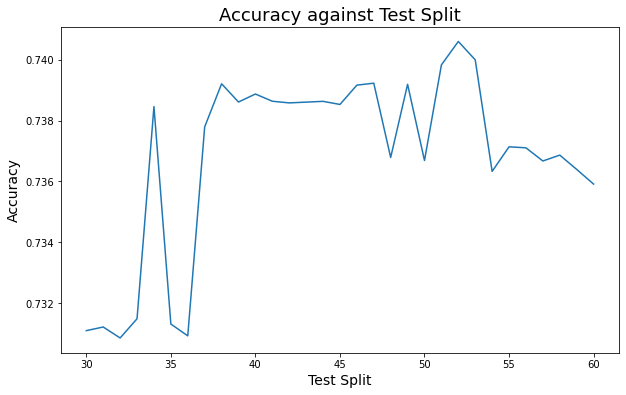

In [153]:
plt.figure(figsize=(10, 6))
plt.plot(range(30, 61), train_score)
plt.xlabel("Test Split", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Accuracy against Test Split", fontsize = 18)
plt.show()

# Neural Networks

In [316]:
import tensorflow as tf

### Linear Classification

In [155]:
from sklearn.linear_model import Perceptron

In [364]:
perceptronClf = Perceptron(tol=1e-3, random_state=42)

In [365]:
perceptronClf.fit(train_data, train_target)

Perceptron(random_state=42)

In [366]:
np.mean(cross_val_score(perceptronClf, train_data, train_target, cv=10, scoring="accuracy"))

0.372086179063026

In [367]:
perceptronClf.score(train_data, train_target)

0.4377224957899

In [368]:
perceptronClf.score(test_data, test_target)

0.43858737990132435

In [161]:
metrics = pd.DataFrame({'Training':perceptronClf.score(train_data, train_target),
                        'Cross Val':np.mean(cross_val_score(perceptronClf, train_data, train_target, cv=10, scoring="accuracy")), 
                        'Test':perceptronClf.score(test_data, test_target)}, index=[0])
metrics.head()

,Training,Cross Val,Test
0,0.437722,0.372086,0.438587


<AxesSubplot:title={'center':'Accuracy on different sets'}>

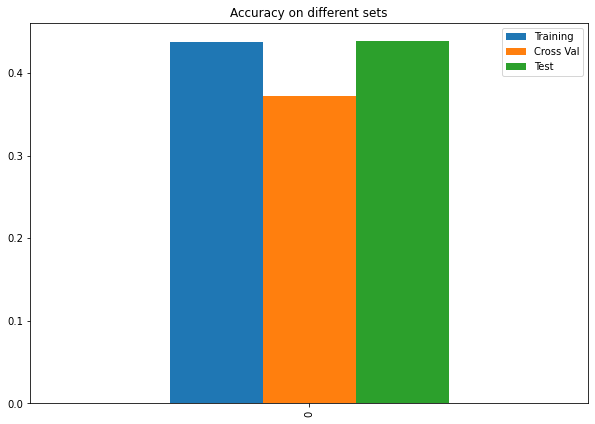

In [162]:
metrics.plot(
        kind='bar',
        stacked=False,
        title='Accuracy on different sets', 
        figsize=(10,7))

The similar accuracy between the Training and Test sets shows that the classifier fits well to new data, however, the overall accuracy of the classifier is fairly low, suggesting that the data is not very linearly seperable.

## Multilayer Perceptron Classifier

In [185]:
from sklearn.neural_network import MLPClassifier

In [190]:
mlpclf = MLPClassifier(random_state=42, max_iter=200)
mlpclf.fit(train_data, train_target)

MLPClassifier(random_state=42)

In [370]:
mlpclf.score(train_data, train_target)

0.5482083093517511

In [371]:
mlpclf.score(test_data, test_target)

0.555959491041288

In [293]:
activationFunctions = ['identity','logistic', 'tanh', 'relu']

### Changing the Activation Function

In [294]:
scores = []
for act in activationFunctions:
    mlpclf = MLPClassifier(random_state=42, max_iter=200, activation = act)
    mlpclf.fit(train_data, train_target)
    scores.append(mlpclf.score(train_data, train_target))

In [295]:
score = pd.DataFrame({  'Identity':scores[0],
                        'Logistic':scores[1], 
                        'Tanh':scores[2],
                        'Relu':scores[3]}, index = [0])

In [296]:
score.head()

,Identity,Logistic,Tanh,Relu
0,0.572126,0.441389,0.441346,0.548208


<AxesSubplot:title={'center':'Accuracy Using Different Activation Functions'}>

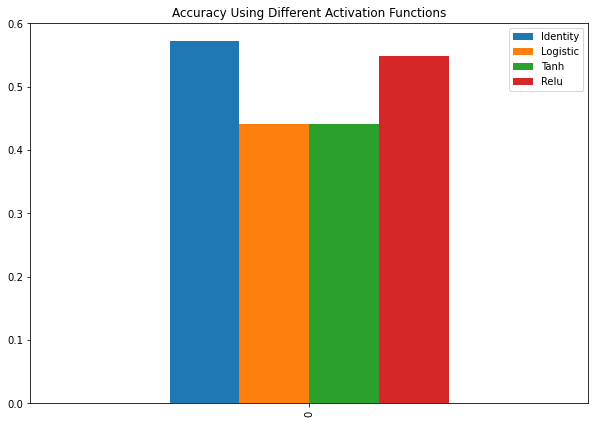

In [297]:
score.plot(
        kind='bar',
        stacked=False,
        title='Accuracy Using Different Activation Functions', 
        figsize=(10,7))

### Changing the Number of nodes per layer

Here I will vary the number of nodes per layer, whilst keeping a constant number of layers and activation function

In [298]:
scores = []
for i in range(5,25,2):
    mlpclf = MLPClassifier(random_state=42, max_iter=200, hidden_layer_sizes=(i,i,i))
    mlpclf.fit(train_data, train_target)
    scores.append(mlpclf.score(train_data, train_target))

In [299]:
scores

[0.6739997015625333,
 0.6916288290592825,
 0.5407686896463516,
 0.5125450320820276,
 0.561552727505276,
 0.6141629894907378,
 0.627486090682356,
 0.5987721429941805,
 0.44529001726673917,
 0.4445652405619151]

In [300]:
score = pd.DataFrame({"Number of Nodes":range(5,25,2),
                         "Scores": scores})

<AxesSubplot:xlabel='Number of Nodes'>

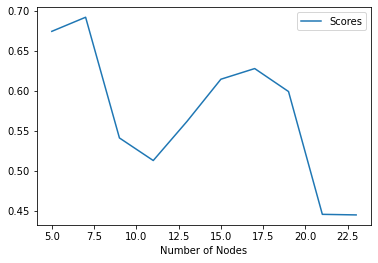

In [301]:
score.plot(kind = "line", x="Number of Nodes", y="Scores")

### Changing the number of Layers

From this, we can see that the optimal number of nodes ~ 7 for 3 layers, I will use this number of nodes to assess the optimal number of layers.

In [181]:
tuples = [(7),(7,7),(7,7,7),(7,7,7,7),(7,7,7,7,7),(7,7,7,7,7,7)]

In [191]:
scores = []
for tup in tuples:
    mlpclf = MLPClassifier(random_state=42, max_iter=200, hidden_layer_sizes=tup)
    mlpclf.fit(train_data, train_target)
    scores.append(mlpclf.score(train_data, train_target))

In [192]:
score = pd.DataFrame({"Number of Layers":range(1,7),
                         "Scores": scores})

<AxesSubplot:xlabel='Number of Layers'>

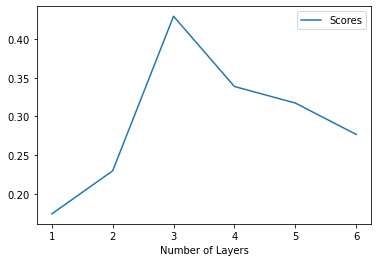

In [193]:
score.plot(kind = "line", x="Number of Layers", y="Scores")

As expected, the optimal number of layers when the number of nodes = 7 is 3, I will now change the number of nodes to see if this optimal value still stands.

In [194]:
tuples = [(17),(17,17),(17,17,17),(17,17,17,17),(17,17,17,17,17),(17,17,17,17,17,17)]

In [195]:
scores = []
for tup in tuples:
    mlpclf = MLPClassifier(random_state=42, max_iter=200, hidden_layer_sizes=tup)
    mlpclf.fit(train_data, train_target)
    scores.append(mlpclf.score(train_data, train_target))

In [196]:
score = pd.DataFrame({"Number of Layers":range(1,7),
                         "Scores": scores})

In [197]:
score

,Number of Layers,Scores
0,1,0.320884
1,2,0.251178
2,3,0.174693
3,4,0.174693
4,5,0.332715
5,6,0.179233


<AxesSubplot:xlabel='Number of Layers'>

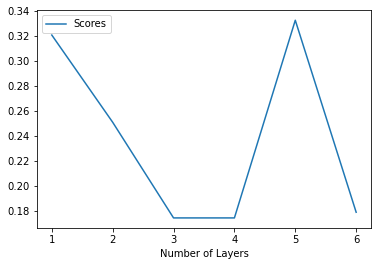

In [198]:
score.plot(kind = "line", x="Number of Layers", y="Scores")

In [199]:
score = pd.DataFrame({"Number of Nodes": [],
                        "Number of Layers":[],
                         "Scores":[]})

In [200]:
for i in range(1,7):
    tuples = [(i),(i,i),(i,i,i),(i,i,i,i),(i,i,i,i,i),(i,i,i,i,i,i)]
    for j in range(0,6):
        mlpclf = MLPClassifier(random_state=42, max_iter=200, hidden_layer_sizes=tuples[j])
        mlpclf.fit(train_data, train_target)
        scoreValue = mlpclf.score(train_data, train_target)
        tmp = pd.DataFrame({"Number of Nodes": i,"Number of Layers":j+1,"Scores":scoreValue}, index=[0])
        score = score.append(tmp)

<AxesSubplot:xlabel='Number of Layers', ylabel='Number of Nodes'>

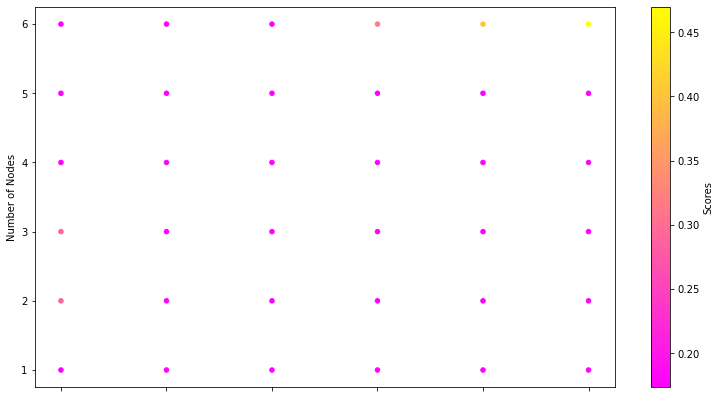

In [209]:
score = score[score.Scores != 0.85]
score.plot(kind = "scatter", x="Number of Layers", y="Number of Nodes",c = "Scores",cmap="spring", figsize=(13,7))

In [206]:
print(score[score["Scores"] == score["Scores"].max()])

   Number of Nodes  Number of Layers    Scores
0              6.0               6.0  0.469868


From this scatter, we can see that as the number of layers increases, the number of nodes per layer should also increase to continue increasing accuracy. In this example, the maximum score occurs when the number of nodes is 6 with 6 layers.

### Learning Rate

In [315]:
lRate = ['constant', 'invscaling', 'adaptive']

In [320]:
scores = []
for r in lRate:
    mlpclf = MLPClassifier(random_state=42, max_iter=200, learning_rate = r, solver = 'sgd')
    mlpclf.fit(train_data, train_target)
    scores.append(mlpclf.score(train_data, train_target))

In [321]:
score = pd.DataFrame({  'Constant':scores[0],
                        'Invscaling':scores[1], 
                        'Adaptive':scores[2]}, index = [0])

<AxesSubplot:title={'center':'Accuracy Using Different Activation Functions'}>

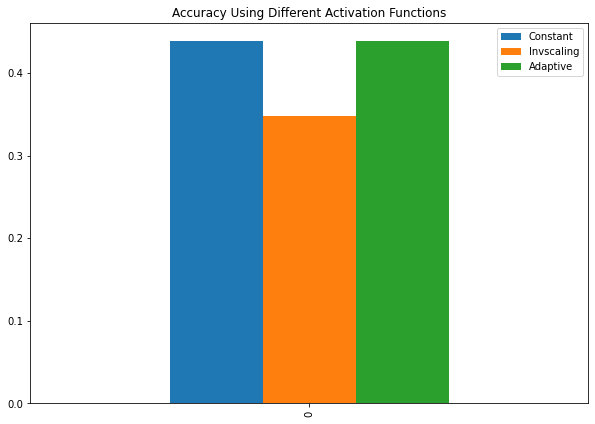

In [322]:
score.plot(
        kind='bar',
        stacked=False,
        title='Accuracy Using Different Learning Rate', 
        figsize=(10,7))

Here we see that the Inverse Scaling learning rate has the lowest accuracy, suggesting that the constant learning rate is more suitable to this problem. As adaptive has the same accuracy as constant, we see that a constant learning rate ensures that training loss keeps decreasing, suggesting it is an optimal learning rate. 

### Momentum

In [326]:
scores = []
for i in range(0,10):
    mlpclf = MLPClassifier(random_state=42, max_iter=200, momentum = i/10, solver = 'sgd')
    mlpclf.fit(train_data, train_target)
    scores.append(mlpclf.score(train_data, train_target))

C:\Users\camer\anaconda3\envs\DataMining\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\camer\anaconda3\envs\DataMining\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\camer\anaconda3\envs\DataMining\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [328]:
score = pd.DataFrame({"Momentum": [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], "Scores":scores})

<AxesSubplot:xlabel='Momentum'>

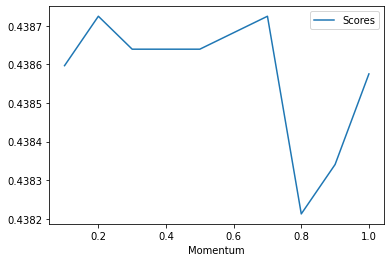

In [330]:
score.plot(kind = "line", x="Momentum", y="Scores")

Changing the momentum shows very little effect on the overall accuracy of the classifier

### Changing Validation Threshold

In [353]:
scores = []
for i in range(1,10):
    mlpclf = MLPClassifier(random_state=42, max_iter=200, validation_fraction = i/10, solver = 'sgd', early_stopping = True)
    mlpclf.fit(train_data, train_target)
    scores.append(mlpclf.score(train_data, train_target))

In [361]:
score = pd.DataFrame({"Validation Threshold":[0.1,0.2, 0.3,0.4,0.5,0.6,0.7,0.8,0.9] , "Scores":scores})

<AxesSubplot:xlabel='Validation Threshold'>

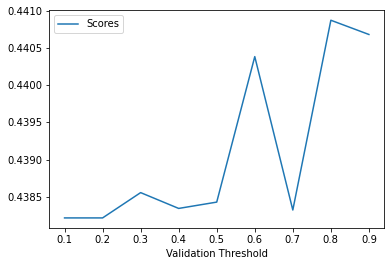

In [362]:
score.plot(kind = "line", x="Validation Threshold", y="Scores")

As the validation threshold increases, so does the accuracy of the model, meaning that when earl stop is checked against the whole dataset, it yields a higher accuracy than when only validated against a smaller portion of the data. This is to be expected, however, the similarity between the values shows that the model is similarly accurate regardless.

### Conclusions on Multilayer Perceptron

Overall, the MLP classifier showed very similar accuracies between the training and test sets, suggesting that it generalises very well to unseen data. However the low accuracy on all of the models is indicitave of a complex model which is not very linearly seperable. The linear activation functions (identity and relu) performed best on my dataset. 

## Convolutional Nerual Networks

In [317]:
dataFrame = salesData.copy()
le = preprocessing.LabelEncoder()

dataFrame = dataFrame[dataFrame.mileage <= 0.4e+06]
dataFrame = dataFrame[dataFrame.price <= 100000]
dataFrame = dataFrame[dataFrame.year >= 1980]
bins = [0,1,2,3,4,5]
dataFrame["bin_price"] = pd.qcut(dataFrame["price"], len(bins), labels=bins)

dataFrame["region"] = le.fit_transform(dataFrame["region"])
dataFrame["manufacturer"] = le.fit_transform(dataFrame["manufacturer"])
dataFrame["model"] = le.fit_transform(dataFrame["model"])
dataFrame["condition"] = le.fit_transform(dataFrame["condition"])
dataFrame["fuel"] = le.fit_transform(dataFrame["fuel"])
dataFrame["title_status"] = le.fit_transform(dataFrame["title_status"])
dataFrame["transmission"] = le.fit_transform(dataFrame["transmission"])
dataFrame["paint_color"] = le.fit_transform(dataFrame["paint_color"])
dataFrame["state"] = le.fit_transform(dataFrame["state"])

dataFrame["age"] = (2023-dataFrame["year"])
dataFrame = dataFrame.drop("year", axis =1)
dataFrame = dataFrame.drop("VIN", axis =1)
dataFrame = dataFrame.drop("lat", axis =1)
dataFrame = dataFrame.drop("long", axis =1)
dataFrame = dataFrame.drop(["state","paint_color","region","fuel","title_status","model"], axis = 1)
dataFrame.head()

,price,manufacturer,condition,cylinders,mileage,transmission,bin_price,age
0,33590,14,2,8,57923.0,2,4,9.0
1,22590,7,2,8,71229.0,2,3,13.0
2,39590,7,2,8,19160.0,2,5,3.0
3,30990,38,2,8,41124.0,2,4,6.0
4,27990,14,2,8,68696.0,2,3,11.0


In [318]:
train, test = train_test_split(dataFrame, test_size = 0.33, random_state = 42)
train_data = train.drop(["price","bin_price"], axis = 1)
train_target = train["bin_price"]

test_data = test.drop(["price","bin_price"], axis = 1)
test_target = test["bin_price"]

In [319]:
train_data.values.shape

(46911, 6)

In [320]:
test_data.values.shape

(23106, 6)

In [321]:
train_data_np = train_data.values.reshape(46911,1,6)

In [322]:
test_data_np = test_data.values.reshape(23106,1,6)

In [340]:
model1conv = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(250,1,activation='relu',input_shape=(1,6)),
        tf.keras.layers.Dense(6,activation='softmax'),
        tf.keras.layers.Dense(6,activation='softmax')
])

model1conv.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model1conv.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_31 (Conv1D)           (None, 1, 250)            1750      
_________________________________________________________________
dense_30 (Dense)             (None, 1, 6)              1506      
_________________________________________________________________
dense_31 (Dense)             (None, 1, 6)              42        
Total params: 3,298
Trainable params: 3,298
Non-trainable params: 0
_________________________________________________________________


In [341]:
model1conv.fit(train_data_np, train_target, epochs=10)

Epoch 1/10
1466/1466 [==============================] - 1s 715us/step - loss: 1.8187 - accuracy: 0.1644
Epoch 2/10
1466/1466 [==============================] - 1s 696us/step - loss: 1.7919 - accuracy: 0.1733
Epoch 3/10
1466/1466 [==============================] - 1s 688us/step - loss: 1.7917 - accuracy: 0.1727
Epoch 4/10
1466/1466 [==============================] - 1s 692us/step - loss: 1.7916 - accuracy: 0.1725
Epoch 5/10
1466/1466 [==============================] - 1s 688us/step - loss: 1.7916 - accuracy: 0.1724
Epoch 6/10
1466/1466 [==============================] - 1s 689us/step - loss: 1.7916 - accuracy: 0.1731
Epoch 7/10
1466/1466 [==============================] - 1s 686us/step - loss: 1.7916 - accuracy: 0.1726
Epoch 8/10
1466/1466 [==============================] - 1s 686us/step - loss: 1.7916 - accuracy: 0.1736
Epoch 9/10
1466/1466 [==============================] - 1s 686us/step - loss: 1.7917 - accuracy: 0.1714
Epoch 10/10
1466/1466 [==============================] - 1s 684u

In [342]:
for i in range(0,10):
    hist = model1conv.fit(train_data_np, train_target, epochs=i)

scores = hist.history["accuracy"]

1466/1466 [==============================] - 1s 698us/step - loss: 1.7916 - accuracy: 0.1733
Epoch 1/2
1466/1466 [==============================] - 1s 695us/step - loss: 1.7916 - accuracy: 0.1739
Epoch 2/2
1466/1466 [==============================] - 1s 733us/step - loss: 1.7915 - accuracy: 0.1740
Epoch 1/3
1466/1466 [==============================] - 1s 728us/step - loss: 1.7916 - accuracy: 0.1732
Epoch 2/3
1466/1466 [==============================] - 1s 691us/step - loss: 1.7915 - accuracy: 0.1710
Epoch 3/3
1466/1466 [==============================] - 1s 694us/step - loss: 1.7915 - accuracy: 0.1734
Epoch 1/4
1466/1466 [==============================] - 1s 690us/step - loss: 1.7917 - accuracy: 0.1718
Epoch 2/4
1466/1466 [==============================] - 1s 698us/step - loss: 1.7915 - accuracy: 0.1712
Epoch 3/4
1466/1466 [==============================] - 1s 700us/step - loss: 1.7915 - accuracy: 0.1732
Epoch 4/4
1466/1466 [==============================] - 1s 689us/step - loss: 1.7916

In [343]:
scores

[0.17409563064575195,
 0.17247553169727325,
 0.17224104702472687,
 0.17311504483222961,
 0.17290188372135162,
 0.17285925149917603,
 0.17226237058639526,
 0.16759395599365234,
 0.16742341220378876]

In [339]:
model2conv = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(400,1,activation='relu',input_shape=(1,6)),
        tf.keras.layers.MaxPooling1D(1),
        tf.keras.layers.Dense(6,activation='softmax'),
        tf.keras.layers.Conv1D(300,1,activation='relu'),
        tf.keras.layers.Dense(6,activation='softmax')
])

model2conv.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model2conv.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_29 (Conv1D)           (None, 1, 400)            2800      
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 1, 400)            0         
_________________________________________________________________
dense_28 (Dense)             (None, 1, 6)              2406      
_________________________________________________________________
conv1d_30 (Conv1D)           (None, 1, 300)            2100      
_________________________________________________________________
dense_29 (Dense)             (None, 1, 6)              1806      
Total params: 9,112
Trainable params: 9,112
Non-trainable params: 0
_________________________________________________________________


In [334]:
for i in range(0,10):
    hist2 = model2conv.fit(train_data_np, train_target, epochs=i)

scores2 = hist2.history["accuracy"]

1466/1466 [==============================] - 1s 1ms/step - loss: 1.7931 - accuracy: 0.1691
Epoch 1/2
1466/1466 [==============================] - 1s 997us/step - loss: 1.7923 - accuracy: 0.1698
Epoch 2/2
1466/1466 [==============================] - 1s 984us/step - loss: 1.7919 - accuracy: 0.1718
Epoch 1/3
1466/1466 [==============================] - 1s 1ms/step - loss: 1.7917 - accuracy: 0.1729
Epoch 2/3
1466/1466 [==============================] - 1s 984us/step - loss: 1.7917 - accuracy: 0.1734
Epoch 3/3
1466/1466 [==============================] - 1s 966us/step - loss: 1.7916 - accuracy: 0.1739
Epoch 1/4
1466/1466 [==============================] - 1s 974us/step - loss: 1.7916 - accuracy: 0.1730
Epoch 2/4
1466/1466 [==============================] - 1s 969us/step - loss: 1.7916 - accuracy: 0.1732
Epoch 3/4
1466/1466 [==============================] - 1s 995us/step - loss: 1.7916 - accuracy: 0.1738
Epoch 4/4
1466/1466 [==============================] - 1s 985us/step - loss: 1.7916 - a

In [335]:
scores2

[0.17390377819538116,
 0.1732642650604248,
 0.17390377819538116,
 0.17390377819538116,
 0.17390377819538116,
 0.1733068972826004,
 0.17390377819538116,
 0.17253948748111725,
 0.17390377819538116]

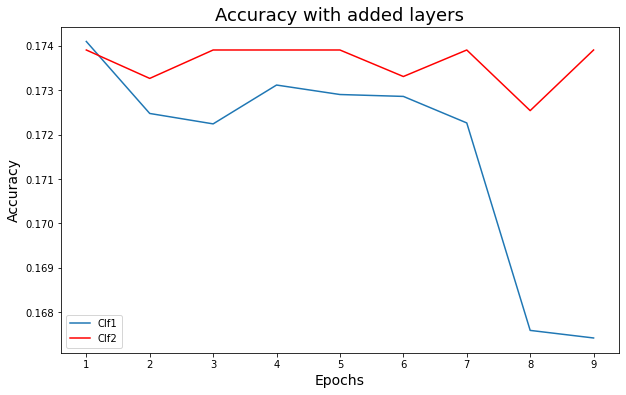

In [344]:
plt.figure(figsize=(10, 6))
plt.plot([1,2,3,4,5,6,7,8,9], scores)
plt.plot([1,2,3,4,5,6,7,8,9], scores2, color = "red")
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Accuracy with added layers", fontsize = 18)
plt.legend(["Clf1","Clf2"])
plt.show()

This shows that with another convolutional layer, and a max pooling layer, the accuracy is greater over a larger number of Epochs, however, due to the lack of spatial features in the dataset, the CNN gives very low accuracies compared with the MLP and other classifiers.